In [125]:
import json
import pandas as pd

from bs4 import BeautifulSoup
from requests import get
import requests

from selenium import webdriver
import time

from random import randint
from time import sleep

import nltk
nltk.download('stopwords')
nltk.download('wordnet')


import pprint
pp = pprint.PrettyPrinter(indent =4)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/minjae/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/minjae/nltk_data...


In [2]:
#This is to flatten nested list
import itertools

def oneDArray(x):
    return list(itertools.chain(*x))

In [3]:
Review = pd.read_json('reviews_Beauty_5.json',lines = True)

In [4]:
Review.tail(100)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
198402,A11J1FHCK5U06J,B00L3K91OW,Karinna Ball,"[0, 0]",First of all - the packaging on this line of p...,5,Another great product from Live Ultimate!,1404345600,"07 3, 2014"
198403,A537XC69FAD3J,B00L3K91OW,L Green,"[0, 0]",I purchased all three of of the Camu products ...,5,Love it,1405382400,"07 15, 2014"
198404,A1U4O1KHE46QR7,B00L3K91OW,Rachel,"[0, 0]",Awesome!!! I am loving this. I've been searchi...,5,Great!,1404691200,"07 7, 2014"
198405,AWHZOUIQ0VO7M,B00L3K91OW,Richard N,"[0, 0]",I purchased three of the Camu Camu products as...,5,I purchased three of the Camu Camu products as...,1405468800,"07 16, 2014"
198406,A1KQNP8MOJDJKC,B00L3K91OW,RS,"[1, 1]","great serum with all the nice ingredients, vit...",5,magic serum,1405296000,"07 14, 2014"
...,...,...,...,...,...,...,...,...,...
198497,A2BLFCOPSMBOZ9,B00LLPT4HI,Dave Edmiston,"[0, 0]",Just a little dab of this shea butter should b...,5,A little dab...,1405468800,"07 16, 2014"
198498,A1UQBFCERIP7VJ,B00LLPT4HI,Margaret Picky,"[0, 0]",This shea butter is completely raw and unrefin...,5,Pure organic raw shea butter,1405296000,"07 14, 2014"
198499,A35Q0RBM3YNQNF,B00LLPT4HI,M. Hill,"[0, 0]",The skin is the body's largest organ and it ab...,5,One Pound Organic Grade A Unrefined Shea Butter,1405468800,"07 16, 2014"
198500,A3LGT6UZL99IW1,B00LLPT4HI,"Richard C. Drew ""Anaal Nathra/Uthe vas Bethod...","[0, 0]",I have very dry elbows and knees. I have a to...,5,This stuff is amazing!,1405382400,"07 15, 2014"


In [5]:
type(Review)

pandas.core.frame.DataFrame

In [6]:
#Writing the json file(in dataframe) into csv
Review.to_csv('Review.csv')

# EDA and Scraping


In [7]:
#Number of data points
Review.shape
#There are 198502 data points

(198502, 9)

In [8]:
#Finding the unique products
len(Review['asin'].unique())
#There are 12101 unique products

12101

In [9]:
#Checking the number of unique users
len(Review['reviewerID'].unique())
#There are 22363 unique user

22363

In [10]:
#columns
Review.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [11]:
Review.head(50)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1YJEY40YUW4SE,7806397051,Andrea,"[3, 4]",Very oily and creamy. Not at all what I expect...,1,Don't waste your money,1391040000,"01 30, 2014"
1,A60XNB876KYML,7806397051,Jessica H.,"[1, 1]",This palette was a decent price and I was look...,3,OK Palette!,1397779200,"04 18, 2014"
2,A3G6XNM240RMWA,7806397051,Karen,"[0, 1]",The texture of this concealer pallet is fantas...,4,great quality,1378425600,"09 6, 2013"
3,A1PQFP6SAJ6D80,7806397051,Norah,"[2, 2]",I really can't tell what exactly this thing is...,2,Do not work on my face,1386460800,"12 8, 2013"
4,A38FVHZTNQ271F,7806397051,Nova Amor,"[0, 0]","It was a little smaller than I expected, but t...",3,It's okay.,1382140800,"10 19, 2013"
5,A3BTN14HIZET6Z,7806397051,"S. M. Randall ""WildHorseWoman""","[1, 2]","I was very happy to get this palette, now I wi...",5,Very nice palette!,1365984000,"04 15, 2013"
6,A1Z59RFKN0M5QL,7806397051,"tasha ""luvely12b""","[1, 3]",PLEASE DONT DO IT! this just rachett the palet...,1,smh!!!,1376611200,"08 16, 2013"
7,AWUO9P6PL1SY8,7806397051,TreMagnifique,"[0, 1]","Chalky,Not Pigmented,Wears off easily,Not a Co...",2,"Chalky, Not Pigmented, Wears off easily, Not a...",1378252800,"09 4, 2013"
8,A3LMILRM9OC3SA,9759091062,NaN,"[0, 0]",Did nothing for me. Stings when I put it on. I...,2,"no Lightening, no Brightening,......NOTHING",1405209600,"07 13, 2014"
9,A30IP88QK3YUIO,9759091062,Amina Bint Ibraheem,"[0, 0]",I bought this product to get rid of the dark s...,3,Its alright,1388102400,"12 27, 2013"


The columns are:
1. reviewerID: This column gives the unique identity to each amazon user.
2 asin: This column gives the product number
3. helpful: List L, where L[0]: Number of people who found it helpful, L[1]: Number of people who did not find it helpful
4.reviewText: Complete descriotion of the review
5.overall: overall rating of the product
6.Summary: brief into to the review
7.unixReviewTime: Time of review
8. reviewTime: Date of Review

The asin column will be used to scrape additional data from the current amazon product website
A list containing unique asin id is formed which will be used to iterate during web scraping


In [12]:
unique_asin =[]
unique_asin = list(Review['asin'].unique())

In [13]:
type(unique_asin)

list

In [14]:
unique_asin[:10]

['7806397051',
 '9759091062',
 '9788072216',
 '9790790961',
 '9790794231',
 'B00004TMFE',
 'B00004TUBL',
 'B00004TUBV',
 'B00004U9UY',
 'B00004U9V2']

The unique_asin list will be iterated through to enter the product page and scrape for more information. Due to block from anti robot pages, fields with unavailable rows will be rescraped using a brand new driver object and then visiting the same url again. 
The url of the product page is of the format: https://www.amazon.com/gp/product/{asin id}

# Web Scraping

In [15]:
#The file did not have updated product name, color and description, we will scrape it from amazon website
import selenium
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

In [16]:
#Instantiating the web driver
service = Service("/Users/minjae/Downloads/dav5400/Final\ Project/chromedriver")
driver = webdriver.Chrome(service=service)

In [17]:
#Creating an empty list to store dictionary for each product
list_of_products = []

The unique_asin list is first iterated and tags are located to scrape the following data
1. Product name
2. Price
3. Rating
4. Number of Rating
5. Category of beauty product
6. Availability

# #Scrape Products

In [18]:
list_of_products = []

#Instantiating the web driver
service = Service("/Users/minjae/Downloads/dav5400/Final\ Project/chromedriver")
driver = webdriver.Chrome(service=service)

#Start looping through products in the asin list
for i in unique_asin:  
    
    # Print the urls at the beginning of each loop 
    print(f'https://www.amazon.com/gp/product/{i}')
    
    # Send webdriver to the url in the loop
    driver.get(f'https://www.amazon.com/gp/product/{i}')
    
    
    # Instantiate BeautifulSoup web scraper 
    soup = BeautifulSoup(driver.page_source, 'lxml') 
    
    # Create an empty dictionary for each product with asin number i
    product_info = {}
    
    #Try to locate tags to web scrape
    try:
        # Save product ID # so I can identify which product the scrape belongs to 
        product_info['asin'] = i

        # Look for product title 
        product_title = soup.find('span', {'id':'productTitle'})
        if product_title is not None:
            prod1_dict['name'] = product_title.text.strip()
        else:
            prod1_dict['name'] = 'Product title not found'
        
        # Look for product categories list 
        category = soup.find('ul', {'class': 'a-unordered-list a-horizontal a-size-small'}).findAll('li')[2]
        if category is not None:
            prod1_dict['category'] = category.text.strip()
        else:
            prod1_dict['category'] = 'category not found'
        
        # Look for product description
        description = soup.find('table', {'class':'a-normal a-spacing-micro'})
        if description is not None:
            prod1_dict['description'] = description.text.strip()
        else:
            prod1_dict['description'] = 'description not found'
        prod1_dict['description'] =" ".join(description.split())
        
        
        #Look for Product Price
        price = soup.find('span', {'class':'a-offscreen'})
        if price is not None:
            prod1_dict['price'] = price.text.strip()
        else:
            prod1_dict['price'] = 'price not found'
        
        #Look for Rating
        rating = soup.find('span', {'class':'a-icon-alt'})
        if rating is not None:
            prod1_dict['rating'] = rating.text.strip()
        else:
            prod1_dict['rating'] = 'rating not found'
        
        #Number of Ratings
        no_of_rating = soup.find('span', {'id':'acrCustomerReviewText'})
        if no_of_rating is not None:
            prod1_dict['No_of_Rating'] = no_of_rating.text.strip()
        else:
            prod1_dict['No_of_Rating'] = 'number of rating is 0'
        
        #Add to dictionary
        print('adding to dictionary',i)
        list_of_products_2000.append(product_info)
        

    except:
        pass
        

        

https://www.amazon.com/gp/product/7806397051
https://www.amazon.com/gp/product/9759091062
https://www.amazon.com/gp/product/9788072216
https://www.amazon.com/gp/product/9790790961
https://www.amazon.com/gp/product/9790794231
https://www.amazon.com/gp/product/B00004TMFE
https://www.amazon.com/gp/product/B00004TUBL
https://www.amazon.com/gp/product/B00004TUBV
https://www.amazon.com/gp/product/B00004U9UY
https://www.amazon.com/gp/product/B00004U9V2
https://www.amazon.com/gp/product/B000050B6U
https://www.amazon.com/gp/product/B000052WY7
https://www.amazon.com/gp/product/B000052WYD
https://www.amazon.com/gp/product/B000052WYL
https://www.amazon.com/gp/product/B000052WYN
https://www.amazon.com/gp/product/B000052X9G
https://www.amazon.com/gp/product/B000052XIA
https://www.amazon.com/gp/product/B000052XW5
https://www.amazon.com/gp/product/B000052XYQ
https://www.amazon.com/gp/product/B000052XZP
https://www.amazon.com/gp/product/B000052XZX
https://www.amazon.com/gp/product/B000052Y25
https://ww

https://www.amazon.com/gp/product/B00008MNZH
https://www.amazon.com/gp/product/B00008MOQE
https://www.amazon.com/gp/product/B00008MOQJ
https://www.amazon.com/gp/product/B00008MOQN
https://www.amazon.com/gp/product/B00008O2X5
https://www.amazon.com/gp/product/B00008PC1O
https://www.amazon.com/gp/product/B00008ZPG9
https://www.amazon.com/gp/product/B00008ZPGA
https://www.amazon.com/gp/product/B000092OX4
https://www.amazon.com/gp/product/B000093A0U
https://www.amazon.com/gp/product/B000093I60
https://www.amazon.com/gp/product/B000094Q6C
https://www.amazon.com/gp/product/B000094ZDX
https://www.amazon.com/gp/product/B0000950LF
https://www.amazon.com/gp/product/B000095SDS
https://www.amazon.com/gp/product/B00009WO0W
https://www.amazon.com/gp/product/B0000AFUTL
https://www.amazon.com/gp/product/B0000AJ3PT
https://www.amazon.com/gp/product/B0000AJ3PU
https://www.amazon.com/gp/product/B0000AJ3Q3
https://www.amazon.com/gp/product/B0000AN9L9
https://www.amazon.com/gp/product/B0000AS54S
https://ww

https://www.amazon.com/gp/product/B0001VOJWI
https://www.amazon.com/gp/product/B0001XKA38
https://www.amazon.com/gp/product/B0001XLSQ6
https://www.amazon.com/gp/product/B0001XLSR0
https://www.amazon.com/gp/product/B0001XQNMK
https://www.amazon.com/gp/product/B0001Y74VS
https://www.amazon.com/gp/product/B0001Y74XG
https://www.amazon.com/gp/product/B0001YOMD6
https://www.amazon.com/gp/product/B0001YXXUY
https://www.amazon.com/gp/product/B0001ZA3Y2
https://www.amazon.com/gp/product/B0001ZA4CS
https://www.amazon.com/gp/product/B0001ZYL3Q
https://www.amazon.com/gp/product/B0001ZYLAO
https://www.amazon.com/gp/product/B0001ZZH0M
https://www.amazon.com/gp/product/B00020DY2O
https://www.amazon.com/gp/product/B00020E1P8
https://www.amazon.com/gp/product/B00021AK4I
https://www.amazon.com/gp/product/B00021AM9G
https://www.amazon.com/gp/product/B00021AQCY
https://www.amazon.com/gp/product/B00021AYF8
https://www.amazon.com/gp/product/B00021B8L2
https://www.amazon.com/gp/product/B00021B95W
https://ww

https://www.amazon.com/gp/product/B0002Z8P1E
https://www.amazon.com/gp/product/B0002Z8P8M
https://www.amazon.com/gp/product/B0002Z8QG8
https://www.amazon.com/gp/product/B0002Z8QHW
https://www.amazon.com/gp/product/B0002Z8RGC
https://www.amazon.com/gp/product/B0002Z8SE8
https://www.amazon.com/gp/product/B0002Z8SZW
https://www.amazon.com/gp/product/B0002Z90RM
https://www.amazon.com/gp/product/B0003009NK
https://www.amazon.com/gp/product/B000629ZHG
https://www.amazon.com/gp/product/B00062A0JI
https://www.amazon.com/gp/product/B00062ADJA
https://www.amazon.com/gp/product/B0006433MM
https://www.amazon.com/gp/product/B00064A5L4
https://www.amazon.com/gp/product/B00064H44K
https://www.amazon.com/gp/product/B00065AFFE
https://www.amazon.com/gp/product/B00066D2JE
https://www.amazon.com/gp/product/B00066D4M4
https://www.amazon.com/gp/product/B00066LD7C
https://www.amazon.com/gp/product/B00066YC34
https://www.amazon.com/gp/product/B000674XN2
https://www.amazon.com/gp/product/B000674XNM
https://ww

https://www.amazon.com/gp/product/B0009ET6BQ
https://www.amazon.com/gp/product/B0009EXM52
https://www.amazon.com/gp/product/B0009EXMB6
https://www.amazon.com/gp/product/B0009EXONC
https://www.amazon.com/gp/product/B0009EXOO6
https://www.amazon.com/gp/product/B0009EXOP0
https://www.amazon.com/gp/product/B0009EXOXW
https://www.amazon.com/gp/product/B0009F3M6A
https://www.amazon.com/gp/product/B0009F3NGE
https://www.amazon.com/gp/product/B0009F3NYQ
https://www.amazon.com/gp/product/B0009F3O18
https://www.amazon.com/gp/product/B0009F3O8Q
https://www.amazon.com/gp/product/B0009F3OOA
https://www.amazon.com/gp/product/B0009F3OR2
https://www.amazon.com/gp/product/B0009F3OS6
https://www.amazon.com/gp/product/B0009F3OX6
https://www.amazon.com/gp/product/B0009F3R7E
https://www.amazon.com/gp/product/B0009FHJOG
https://www.amazon.com/gp/product/B0009FHJRS
https://www.amazon.com/gp/product/B0009G05W8
https://www.amazon.com/gp/product/B0009GGY96
https://www.amazon.com/gp/product/B0009H04LO
https://ww

https://www.amazon.com/gp/product/B000AO2NXS
https://www.amazon.com/gp/product/B000AQF50Y
https://www.amazon.com/gp/product/B000AQI2EK
https://www.amazon.com/gp/product/B000ARDBH2
https://www.amazon.com/gp/product/B000ASDGK8
https://www.amazon.com/gp/product/B000ASDX3S
https://www.amazon.com/gp/product/B000AU15E0
https://www.amazon.com/gp/product/B000AUTH0E
https://www.amazon.com/gp/product/B000AUTHEA
https://www.amazon.com/gp/product/B000AYKVOG
https://www.amazon.com/gp/product/B000B45BUE
https://www.amazon.com/gp/product/B000B5S2LS
https://www.amazon.com/gp/product/B000B5UPF4
https://www.amazon.com/gp/product/B000B63Y1K
https://www.amazon.com/gp/product/B000B6VIPY
https://www.amazon.com/gp/product/B000B7VO66
https://www.amazon.com/gp/product/B000B82TD2
https://www.amazon.com/gp/product/B000B8FW0Y
https://www.amazon.com/gp/product/B000B8VBJK
https://www.amazon.com/gp/product/B000B9J3GM
https://www.amazon.com/gp/product/B000B9N0N4
https://www.amazon.com/gp/product/B000B9W3CI
https://ww

https://www.amazon.com/gp/product/B000C234ZY
https://www.amazon.com/gp/product/B000C2359E
https://www.amazon.com/gp/product/B000C235A8
https://www.amazon.com/gp/product/B000C235E4
https://www.amazon.com/gp/product/B000C235LW
https://www.amazon.com/gp/product/B000C2365C
https://www.amazon.com/gp/product/B000C237HO
https://www.amazon.com/gp/product/B000CBXDRE
https://www.amazon.com/gp/product/B000CC08VC
https://www.amazon.com/gp/product/B000CECSAO
https://www.amazon.com/gp/product/B000CED0VK
https://www.amazon.com/gp/product/B000CEOQUO
https://www.amazon.com/gp/product/B000CEQZZS
https://www.amazon.com/gp/product/B000CI9XGM
https://www.amazon.com/gp/product/B000CIBVP8
https://www.amazon.com/gp/product/B000CIU7H6
https://www.amazon.com/gp/product/B000CNIHEG
https://www.amazon.com/gp/product/B000CNME1I
https://www.amazon.com/gp/product/B000CNTT9I
https://www.amazon.com/gp/product/B000COMJNK
https://www.amazon.com/gp/product/B000CONLRI
https://www.amazon.com/gp/product/B000CPIMNA
https://ww

https://www.amazon.com/gp/product/B000FIFJBM
https://www.amazon.com/gp/product/B000FJU4HK
https://www.amazon.com/gp/product/B000FKGSJC
https://www.amazon.com/gp/product/B000FKJYV6
https://www.amazon.com/gp/product/B000FL223W
https://www.amazon.com/gp/product/B000FL4410
https://www.amazon.com/gp/product/B000FLGU30
https://www.amazon.com/gp/product/B000FLIJB6
https://www.amazon.com/gp/product/B000FLJQTA
https://www.amazon.com/gp/product/B000FLLUDU
https://www.amazon.com/gp/product/B000FLPHL6
https://www.amazon.com/gp/product/B000FNCS5M
https://www.amazon.com/gp/product/B000FP7ZLM
https://www.amazon.com/gp/product/B000FPPW9O
https://www.amazon.com/gp/product/B000FPVMCU
https://www.amazon.com/gp/product/B000FPWUOO
https://www.amazon.com/gp/product/B000FQ4ZSM
https://www.amazon.com/gp/product/B000FQ4ZX2
https://www.amazon.com/gp/product/B000FQ73O0
https://www.amazon.com/gp/product/B000FQNOQG
https://www.amazon.com/gp/product/B000FQOQ5Y
https://www.amazon.com/gp/product/B000FQSANI
https://ww

https://www.amazon.com/gp/product/B000H0JYYG
https://www.amazon.com/gp/product/B000H0XV3G
https://www.amazon.com/gp/product/B000H3CPE4
https://www.amazon.com/gp/product/B000H3CPNU
https://www.amazon.com/gp/product/B000H3CPO4
https://www.amazon.com/gp/product/B000H3EMMM
https://www.amazon.com/gp/product/B000H3EMPO
https://www.amazon.com/gp/product/B000H3ENH6
https://www.amazon.com/gp/product/B000H3EO34
https://www.amazon.com/gp/product/B000H3EO9I
https://www.amazon.com/gp/product/B000H3EOLG
https://www.amazon.com/gp/product/B000H3GCXY
https://www.amazon.com/gp/product/B000H3GDZQ
https://www.amazon.com/gp/product/B000H3I0JS
https://www.amazon.com/gp/product/B000H3I30O
https://www.amazon.com/gp/product/B000H3I33G
https://www.amazon.com/gp/product/B000H3I3Y0
https://www.amazon.com/gp/product/B000H3NF5W
https://www.amazon.com/gp/product/B000H3O90C
https://www.amazon.com/gp/product/B000H6CACS
https://www.amazon.com/gp/product/B000H6P7HS
https://www.amazon.com/gp/product/B000H74SE0
https://ww

https://www.amazon.com/gp/product/B000KOHSQA
https://www.amazon.com/gp/product/B000KOLXKM
https://www.amazon.com/gp/product/B000KOM08Q
https://www.amazon.com/gp/product/B000KONYJK
https://www.amazon.com/gp/product/B000KONYPY
https://www.amazon.com/gp/product/B000KOO8AY
https://www.amazon.com/gp/product/B000KOOCQO
https://www.amazon.com/gp/product/B000KPI71O
https://www.amazon.com/gp/product/B000KPO99I
https://www.amazon.com/gp/product/B000KPSSJK
https://www.amazon.com/gp/product/B000KPZ7SK
https://www.amazon.com/gp/product/B000KQ1E5Y
https://www.amazon.com/gp/product/B000KQ73J0
https://www.amazon.com/gp/product/B000KQ746W
https://www.amazon.com/gp/product/B000KQ7U84
https://www.amazon.com/gp/product/B000KQ9TME
https://www.amazon.com/gp/product/B000KQ9TPG
https://www.amazon.com/gp/product/B000KQB0YE
https://www.amazon.com/gp/product/B000KQB1SY
https://www.amazon.com/gp/product/B000KQBQTI
https://www.amazon.com/gp/product/B000KQD470
https://www.amazon.com/gp/product/B000KVH1QU
https://ww

https://www.amazon.com/gp/product/B000NRV00Y
https://www.amazon.com/gp/product/B000NRVG26
https://www.amazon.com/gp/product/B000NSH2L4
https://www.amazon.com/gp/product/B000NSIG8M
https://www.amazon.com/gp/product/B000NSIGE6
https://www.amazon.com/gp/product/B000NSQ63E
https://www.amazon.com/gp/product/B000NSQI4Q
https://www.amazon.com/gp/product/B000NSQM6U
https://www.amazon.com/gp/product/B000NSTX20
https://www.amazon.com/gp/product/B000NT2EE8
https://www.amazon.com/gp/product/B000NU2OOM
https://www.amazon.com/gp/product/B000NUMRXK
https://www.amazon.com/gp/product/B000NURPK0
https://www.amazon.com/gp/product/B000NUTUMQ
https://www.amazon.com/gp/product/B000NUW8V6
https://www.amazon.com/gp/product/B000NUW8W0
https://www.amazon.com/gp/product/B000NVFWB8
https://www.amazon.com/gp/product/B000NVIFFS
https://www.amazon.com/gp/product/B000NVMM1G
https://www.amazon.com/gp/product/B000NW4I7G
https://www.amazon.com/gp/product/B000NW4LDM
https://www.amazon.com/gp/product/B000NW4LDW
https://ww

https://www.amazon.com/gp/product/B000PI9MO2
https://www.amazon.com/gp/product/B000PILEWA
https://www.amazon.com/gp/product/B000PIMUR8
https://www.amazon.com/gp/product/B000PIXLB2
https://www.amazon.com/gp/product/B000PK4XRQ
https://www.amazon.com/gp/product/B000PKUYYW
https://www.amazon.com/gp/product/B000PKUZ5U
https://www.amazon.com/gp/product/B000PKWAWQ
https://www.amazon.com/gp/product/B000PKYBXM
https://www.amazon.com/gp/product/B000PKYCJA
https://www.amazon.com/gp/product/B000PKZFTQ
https://www.amazon.com/gp/product/B000PKZG22
https://www.amazon.com/gp/product/B000PLS9YS
https://www.amazon.com/gp/product/B000PLUZL8
https://www.amazon.com/gp/product/B000PNTQS4
https://www.amazon.com/gp/product/B000PNTQW0
https://www.amazon.com/gp/product/B000PNVSBW
https://www.amazon.com/gp/product/B000PNXBU8
https://www.amazon.com/gp/product/B000POX044
https://www.amazon.com/gp/product/B000POYVHY
https://www.amazon.com/gp/product/B000PP15L8
https://www.amazon.com/gp/product/B000PP43XU
https://ww

https://www.amazon.com/gp/product/B000SSDTOI
https://www.amazon.com/gp/product/B000SSDTOS
https://www.amazon.com/gp/product/B000SSG0EE
https://www.amazon.com/gp/product/B000SSNSAS
https://www.amazon.com/gp/product/B000SWY02O
https://www.amazon.com/gp/product/B000SWY05Q
https://www.amazon.com/gp/product/B000SX3380
https://www.amazon.com/gp/product/B000SZVQTQ
https://www.amazon.com/gp/product/B000T217KG
https://www.amazon.com/gp/product/B000T55RSG
https://www.amazon.com/gp/product/B000T5CSR4
https://www.amazon.com/gp/product/B000T5KATM
https://www.amazon.com/gp/product/B000T7P0KO
https://www.amazon.com/gp/product/B000T9BMBS
https://www.amazon.com/gp/product/B000T9ZCL4
https://www.amazon.com/gp/product/B000TAA9Q6
https://www.amazon.com/gp/product/B000TADQDO
https://www.amazon.com/gp/product/B000TAE0RK
https://www.amazon.com/gp/product/B000TAV7VM
https://www.amazon.com/gp/product/B000TAVKUK
https://www.amazon.com/gp/product/B000TBW0NA
https://www.amazon.com/gp/product/B000TBXWNW
https://ww

https://www.amazon.com/gp/product/B000VEWF2Q
https://www.amazon.com/gp/product/B000VF023E
https://www.amazon.com/gp/product/B000VF5WVG
https://www.amazon.com/gp/product/B000VFUS0Q
https://www.amazon.com/gp/product/B000VHA9YO
https://www.amazon.com/gp/product/B000VHAA84
https://www.amazon.com/gp/product/B000VHH6S6
https://www.amazon.com/gp/product/B000VHH712
https://www.amazon.com/gp/product/B000VHH71W
https://www.amazon.com/gp/product/B000VHTU80
https://www.amazon.com/gp/product/B000VI1186
https://www.amazon.com/gp/product/B000VICKKO
https://www.amazon.com/gp/product/B000VJ7PC6
https://www.amazon.com/gp/product/B000VJRCNI
https://www.amazon.com/gp/product/B000VL292A
https://www.amazon.com/gp/product/B000VLH8W6
https://www.amazon.com/gp/product/B000VNIZGM
https://www.amazon.com/gp/product/B000VOHH56
https://www.amazon.com/gp/product/B000VOHR88
https://www.amazon.com/gp/product/B000VOJ9BG
https://www.amazon.com/gp/product/B000VOJB50
https://www.amazon.com/gp/product/B000VOJHE0
https://ww

https://www.amazon.com/gp/product/B000XTCFOC
https://www.amazon.com/gp/product/B000XTD226
https://www.amazon.com/gp/product/B000XTDYJW
https://www.amazon.com/gp/product/B000XTFP0I
https://www.amazon.com/gp/product/B000XU49MW
https://www.amazon.com/gp/product/B000XU49RW
https://www.amazon.com/gp/product/B000XVDNCI
https://www.amazon.com/gp/product/B000XVEZFC
https://www.amazon.com/gp/product/B000XY9LT4
https://www.amazon.com/gp/product/B000XYD7CG
https://www.amazon.com/gp/product/B000XYPNMS
https://www.amazon.com/gp/product/B000XZKVHE
https://www.amazon.com/gp/product/B000XZSVQC
https://www.amazon.com/gp/product/B000Y038CS
https://www.amazon.com/gp/product/B000Y144SE
https://www.amazon.com/gp/product/B000Y18UKM
https://www.amazon.com/gp/product/B000Y1JT8E
https://www.amazon.com/gp/product/B000Y4357C
https://www.amazon.com/gp/product/B000Y8GF2K
https://www.amazon.com/gp/product/B000Y8X0LE
https://www.amazon.com/gp/product/B000YA3HVK
https://www.amazon.com/gp/product/B000YB1XRO
https://ww

https://www.amazon.com/gp/product/B0011UVCKU
https://www.amazon.com/gp/product/B0011UWXM6
https://www.amazon.com/gp/product/B0011UYY9Q
https://www.amazon.com/gp/product/B0011V0QH4
https://www.amazon.com/gp/product/B0011V0QIS
https://www.amazon.com/gp/product/B0011XEIFS
https://www.amazon.com/gp/product/B0011XWPNK
https://www.amazon.com/gp/product/B0011XZZF0
https://www.amazon.com/gp/product/B0011Z3WU8
https://www.amazon.com/gp/product/B0011Z3X8O
https://www.amazon.com/gp/product/B00120IJSC
https://www.amazon.com/gp/product/B00120U5D4
https://www.amazon.com/gp/product/B00120U5E8
https://www.amazon.com/gp/product/B00120VWRW
https://www.amazon.com/gp/product/B00120VWTK
https://www.amazon.com/gp/product/B00120XR0M
https://www.amazon.com/gp/product/B00120XR1G
https://www.amazon.com/gp/product/B001211B0Y
https://www.amazon.com/gp/product/B0012134EK
https://www.amazon.com/gp/product/B00121PZZG
https://www.amazon.com/gp/product/B00121TEQW
https://www.amazon.com/gp/product/B00121TESA
https://ww

https://www.amazon.com/gp/product/B0013YXQ58
https://www.amazon.com/gp/product/B0013YYNDM
https://www.amazon.com/gp/product/B0013ZCPIG
https://www.amazon.com/gp/product/B00140RXHS
https://www.amazon.com/gp/product/B00140TXWQ
https://www.amazon.com/gp/product/B001410OG4
https://www.amazon.com/gp/product/B00141XJJS
https://www.amazon.com/gp/product/B0014272H2
https://www.amazon.com/gp/product/B00142C8KS
https://www.amazon.com/gp/product/B00142DXVG
https://www.amazon.com/gp/product/B00142DXXE
https://www.amazon.com/gp/product/B00143S6YO
https://www.amazon.com/gp/product/B00143UYPS
https://www.amazon.com/gp/product/B00143WQI6
https://www.amazon.com/gp/product/B001441QCW
https://www.amazon.com/gp/product/B001441QE0
https://www.amazon.com/gp/product/B001441QFE
https://www.amazon.com/gp/product/B0014568CO
https://www.amazon.com/gp/product/B0014568D8
https://www.amazon.com/gp/product/B00147FGJ8
https://www.amazon.com/gp/product/B0014A5P8C
https://www.amazon.com/gp/product/B0014A5QEK
https://ww

https://www.amazon.com/gp/product/B00171ARH2
https://www.amazon.com/gp/product/B00171ETM6
https://www.amazon.com/gp/product/B001720JL0
https://www.amazon.com/gp/product/B001738HJ0
https://www.amazon.com/gp/product/B00174GJC6
https://www.amazon.com/gp/product/B00174LGSI
https://www.amazon.com/gp/product/B00175X9WI
https://www.amazon.com/gp/product/B00175XIRY
https://www.amazon.com/gp/product/B0017686ZC
https://www.amazon.com/gp/product/B00176B9JC
https://www.amazon.com/gp/product/B00176GW5I
https://www.amazon.com/gp/product/B00176VZB4
https://www.amazon.com/gp/product/B00176WU7W
https://www.amazon.com/gp/product/B00176YZUM
https://www.amazon.com/gp/product/B001782OO4
https://www.amazon.com/gp/product/B00178RONK
https://www.amazon.com/gp/product/B00178SOCA
https://www.amazon.com/gp/product/B00178TVXG
https://www.amazon.com/gp/product/B00178VX50
https://www.amazon.com/gp/product/B001795T6I
https://www.amazon.com/gp/product/B0017BGQR2
https://www.amazon.com/gp/product/B0017BI7NS
https://ww

https://www.amazon.com/gp/product/B0019I6GFU
https://www.amazon.com/gp/product/B0019I83N8
https://www.amazon.com/gp/product/B0019IC2N0
https://www.amazon.com/gp/product/B0019IVEEI
https://www.amazon.com/gp/product/B0019JAQPA
https://www.amazon.com/gp/product/B0019K9EZC
https://www.amazon.com/gp/product/B0019KK37U
https://www.amazon.com/gp/product/B0019LP8UQ
https://www.amazon.com/gp/product/B0019LPNHY
https://www.amazon.com/gp/product/B0019LRD9A
https://www.amazon.com/gp/product/B0019LRYQW
https://www.amazon.com/gp/product/B0019LT2I0
https://www.amazon.com/gp/product/B0019LTGBS
https://www.amazon.com/gp/product/B0019LV2QU
https://www.amazon.com/gp/product/B0019LVFI0
https://www.amazon.com/gp/product/B0019LVFO4
https://www.amazon.com/gp/product/B0019LVG52
https://www.amazon.com/gp/product/B0019LWU2K
https://www.amazon.com/gp/product/B0019M1ARK
https://www.amazon.com/gp/product/B0019N6RFO
https://www.amazon.com/gp/product/B0019QHUTI
https://www.amazon.com/gp/product/B0019QL0OY
https://ww

https://www.amazon.com/gp/product/B001C1LBG8
https://www.amazon.com/gp/product/B001C2E10A
https://www.amazon.com/gp/product/B001C2NF5M
https://www.amazon.com/gp/product/B001C2WQNY
https://www.amazon.com/gp/product/B001C3HF20
https://www.amazon.com/gp/product/B001C4Q3UY
https://www.amazon.com/gp/product/B001C53IBU
https://www.amazon.com/gp/product/B001C60YA2
https://www.amazon.com/gp/product/B001C69L6K
https://www.amazon.com/gp/product/B001C6H6F8
https://www.amazon.com/gp/product/B001C6KMYU
https://www.amazon.com/gp/product/B001C7FEMO
https://www.amazon.com/gp/product/B001C9QET4
https://www.amazon.com/gp/product/B001CB2OQO
https://www.amazon.com/gp/product/B001CBEQME
https://www.amazon.com/gp/product/B001CC1VV2
https://www.amazon.com/gp/product/B001CCQ84C
https://www.amazon.com/gp/product/B001CE6T76
https://www.amazon.com/gp/product/B001CENUPU
https://www.amazon.com/gp/product/B001CEPXKU
https://www.amazon.com/gp/product/B001CEWDHG
https://www.amazon.com/gp/product/B001CJCFBK
https://ww

https://www.amazon.com/gp/product/B001E8WBP4
https://www.amazon.com/gp/product/B001E919LU
https://www.amazon.com/gp/product/B001E96KYG
https://www.amazon.com/gp/product/B001E96KZ0
https://www.amazon.com/gp/product/B001E96L1S
https://www.amazon.com/gp/product/B001E96L2W
https://www.amazon.com/gp/product/B001E96L6I
https://www.amazon.com/gp/product/B001E96L72
https://www.amazon.com/gp/product/B001E96L9A
https://www.amazon.com/gp/product/B001E96L9K
https://www.amazon.com/gp/product/B001E96LB8
https://www.amazon.com/gp/product/B001E96LCM
https://www.amazon.com/gp/product/B001E96LSQ
https://www.amazon.com/gp/product/B001E96LWM
https://www.amazon.com/gp/product/B001E96M58
https://www.amazon.com/gp/product/B001E96MQC
https://www.amazon.com/gp/product/B001E96MQM
https://www.amazon.com/gp/product/B001E96MTY
https://www.amazon.com/gp/product/B001E96MUI
https://www.amazon.com/gp/product/B001E96MZ8
https://www.amazon.com/gp/product/B001E96N20
https://www.amazon.com/gp/product/B001E96N2U
https://ww

https://www.amazon.com/gp/product/B001F51TGI
https://www.amazon.com/gp/product/B001F51THW
https://www.amazon.com/gp/product/B001F51TNQ
https://www.amazon.com/gp/product/B001F51TR2
https://www.amazon.com/gp/product/B001F51TS6
https://www.amazon.com/gp/product/B001F51TTA
https://www.amazon.com/gp/product/B001F51TVI
https://www.amazon.com/gp/product/B001F51V3E
https://www.amazon.com/gp/product/B001F51V9S
https://www.amazon.com/gp/product/B001F51VAM
https://www.amazon.com/gp/product/B001FB5HZG
https://www.amazon.com/gp/product/B001FB5IDW
https://www.amazon.com/gp/product/B001FB5IEG
https://www.amazon.com/gp/product/B001FB5IFK
https://www.amazon.com/gp/product/B001FB5IFU
https://www.amazon.com/gp/product/B001FB5IIC
https://www.amazon.com/gp/product/B001FB5IIM
https://www.amazon.com/gp/product/B001FB5IMI
https://www.amazon.com/gp/product/B001FB5IN2
https://www.amazon.com/gp/product/B001FB5IQO
https://www.amazon.com/gp/product/B001FB5IRI
https://www.amazon.com/gp/product/B001FB5NTG
https://ww

https://www.amazon.com/gp/product/B001J9LLX6
https://www.amazon.com/gp/product/B001JDEP8K
https://www.amazon.com/gp/product/B001JDHR4Y
https://www.amazon.com/gp/product/B001JHVEE4
https://www.amazon.com/gp/product/B001JHZ6W0
https://www.amazon.com/gp/product/B001JHZ8H8
https://www.amazon.com/gp/product/B001JK6N3I
https://www.amazon.com/gp/product/B001JK6PKE
https://www.amazon.com/gp/product/B001JKNJL2
https://www.amazon.com/gp/product/B001JKTTVQ
https://www.amazon.com/gp/product/B001JKYD4Y
https://www.amazon.com/gp/product/B001JL40V4
https://www.amazon.com/gp/product/B001JQLNFA
https://www.amazon.com/gp/product/B001JQLNJ6
https://www.amazon.com/gp/product/B001JQLNJG
https://www.amazon.com/gp/product/B001JQLNJQ
https://www.amazon.com/gp/product/B001JQLNLY
https://www.amazon.com/gp/product/B001JQLNM8
https://www.amazon.com/gp/product/B001JQLNMI
https://www.amazon.com/gp/product/B001JQLNMS
https://www.amazon.com/gp/product/B001JQLNNC
https://www.amazon.com/gp/product/B001JQLNNM
https://ww

https://www.amazon.com/gp/product/B001MP471K
https://www.amazon.com/gp/product/B001MP5X2M
https://www.amazon.com/gp/product/B001MP7HYE
https://www.amazon.com/gp/product/B001MP7HYY
https://www.amazon.com/gp/product/B001MP7I2A
https://www.amazon.com/gp/product/B001MPWO5G
https://www.amazon.com/gp/product/B001MS7GY2
https://www.amazon.com/gp/product/B001MS7H78
https://www.amazon.com/gp/product/B001MS7HF0
https://www.amazon.com/gp/product/B001MTFMOM
https://www.amazon.com/gp/product/B001MTFMPG
https://www.amazon.com/gp/product/B001MUH190
https://www.amazon.com/gp/product/B001MURXP2
https://www.amazon.com/gp/product/B001MV5TQQ
https://www.amazon.com/gp/product/B001MV5TX4
https://www.amazon.com/gp/product/B001MV5UEC
https://www.amazon.com/gp/product/B001MW1MKM
https://www.amazon.com/gp/product/B001MW38KY
https://www.amazon.com/gp/product/B001MW4VXW
https://www.amazon.com/gp/product/B001MWV40U
https://www.amazon.com/gp/product/B001MX89Y8
https://www.amazon.com/gp/product/B001MXKG6M
https://ww

https://www.amazon.com/gp/product/B001RVFZQU
https://www.amazon.com/gp/product/B001RVGVF4
https://www.amazon.com/gp/product/B001RVMHMU
https://www.amazon.com/gp/product/B001RVMQX0
https://www.amazon.com/gp/product/B001S261Q6
https://www.amazon.com/gp/product/B001S3I57S
https://www.amazon.com/gp/product/B001S44J4A
https://www.amazon.com/gp/product/B001S46QIM
https://www.amazon.com/gp/product/B001S48HLG
https://www.amazon.com/gp/product/B001S48IJC
https://www.amazon.com/gp/product/B001S4AM14
https://www.amazon.com/gp/product/B001S4C91K
https://www.amazon.com/gp/product/B001S9YJ1S
https://www.amazon.com/gp/product/B001SA5DZS
https://www.amazon.com/gp/product/B001SAQBEA
https://www.amazon.com/gp/product/B001SAUBOQ
https://www.amazon.com/gp/product/B001SB9CL8
https://www.amazon.com/gp/product/B001SERK9G
https://www.amazon.com/gp/product/B001SF0I26
https://www.amazon.com/gp/product/B001SFRS2O
https://www.amazon.com/gp/product/B001SG7DRS
https://www.amazon.com/gp/product/B001SG7DUU
https://ww

https://www.amazon.com/gp/product/B0020MM8TW
https://www.amazon.com/gp/product/B0020MM8WO
https://www.amazon.com/gp/product/B0020MMCJI
https://www.amazon.com/gp/product/B0020MMCZW
https://www.amazon.com/gp/product/B0020MMD0G
https://www.amazon.com/gp/product/B0020MMD4W
https://www.amazon.com/gp/product/B0020MMDF6
https://www.amazon.com/gp/product/B0020VJTDG
https://www.amazon.com/gp/product/B0020YLEYK
https://www.amazon.com/gp/product/B0021CAB0Y
https://www.amazon.com/gp/product/B0021EY2O8
https://www.amazon.com/gp/product/B0021LL1MM
https://www.amazon.com/gp/product/B0021MLVA8
https://www.amazon.com/gp/product/B0021W0B0O
https://www.amazon.com/gp/product/B0021W4WUE
https://www.amazon.com/gp/product/B0022077CK
https://www.amazon.com/gp/product/B0022H6JQI
https://www.amazon.com/gp/product/B0022NHBFK
https://www.amazon.com/gp/product/B0022PG9G0
https://www.amazon.com/gp/product/B0022PG9QK
https://www.amazon.com/gp/product/B0022V2PKI
https://www.amazon.com/gp/product/B00239YCXM
https://ww

https://www.amazon.com/gp/product/B002BPY7H4
https://www.amazon.com/gp/product/B002BQ3EHM
https://www.amazon.com/gp/product/B002BQP3GC
https://www.amazon.com/gp/product/B002BS43HU
https://www.amazon.com/gp/product/B002BVWIQA
https://www.amazon.com/gp/product/B002BW3LT2
https://www.amazon.com/gp/product/B002BWOXWG
https://www.amazon.com/gp/product/B002BWOXXK
https://www.amazon.com/gp/product/B002BWOXYE
https://www.amazon.com/gp/product/B002BWOY1G
https://www.amazon.com/gp/product/B002BWOY3Y
https://www.amazon.com/gp/product/B002BWOY6G
https://www.amazon.com/gp/product/B002BWPXFW
https://www.amazon.com/gp/product/B002BWPXGQ
https://www.amazon.com/gp/product/B002BWPXH0
https://www.amazon.com/gp/product/B002BXGBSY
https://www.amazon.com/gp/product/B002BXGV52
https://www.amazon.com/gp/product/B002C0338W
https://www.amazon.com/gp/product/B002C0CZEU
https://www.amazon.com/gp/product/B002C1JEPM
https://www.amazon.com/gp/product/B002C3UMLK
https://www.amazon.com/gp/product/B002C4V3WG
https://ww

https://www.amazon.com/gp/product/B002HK2GOO
https://www.amazon.com/gp/product/B002HK2GWG
https://www.amazon.com/gp/product/B002HK2H1G
https://www.amazon.com/gp/product/B002HM3EM0
https://www.amazon.com/gp/product/B002HMCIOK
https://www.amazon.com/gp/product/B002HMYF8W
https://www.amazon.com/gp/product/B002HPBF32
https://www.amazon.com/gp/product/B002HPFILC
https://www.amazon.com/gp/product/B002HRENPW
https://www.amazon.com/gp/product/B002HSWFWY
https://www.amazon.com/gp/product/B002HWS7LS
https://www.amazon.com/gp/product/B002HWS7NQ
https://www.amazon.com/gp/product/B002HWS7RM
https://www.amazon.com/gp/product/B002HWS7UY
https://www.amazon.com/gp/product/B002HY10J2
https://www.amazon.com/gp/product/B002HZAZEM
https://www.amazon.com/gp/product/B002HZVOLA
https://www.amazon.com/gp/product/B002I4Z6TG
https://www.amazon.com/gp/product/B002IACDGY
https://www.amazon.com/gp/product/B002IB4KGE
https://www.amazon.com/gp/product/B002IDPHBE
https://www.amazon.com/gp/product/B002IFT5VA
https://ww

https://www.amazon.com/gp/product/B002O0D8P8
https://www.amazon.com/gp/product/B002ON11RW
https://www.amazon.com/gp/product/B002OO16QC
https://www.amazon.com/gp/product/B002OSEMYG
https://www.amazon.com/gp/product/B002OSWW3O
https://www.amazon.com/gp/product/B002OU7V42
https://www.amazon.com/gp/product/B002OUTRQ2
https://www.amazon.com/gp/product/B002OVV7F0
https://www.amazon.com/gp/product/B002P3L08Q
https://www.amazon.com/gp/product/B002P3L99G
https://www.amazon.com/gp/product/B002P9FGWQ
https://www.amazon.com/gp/product/B002P9O45Q
https://www.amazon.com/gp/product/B002PA2LNC
https://www.amazon.com/gp/product/B002PAJ8QA
https://www.amazon.com/gp/product/B002PBACLY
https://www.amazon.com/gp/product/B002PBAJ4Y
https://www.amazon.com/gp/product/B002PBC9Y2
https://www.amazon.com/gp/product/B002PBCABY
https://www.amazon.com/gp/product/B002PBCAEQ
https://www.amazon.com/gp/product/B002PBEAYE
https://www.amazon.com/gp/product/B002PBEDFK
https://www.amazon.com/gp/product/B002PBEDT6
https://ww

https://www.amazon.com/gp/product/B002U8L18K
https://www.amazon.com/gp/product/B002UBF2YG
https://www.amazon.com/gp/product/B002UBOFFI
https://www.amazon.com/gp/product/B002UBVZYC
https://www.amazon.com/gp/product/B002UD52N0
https://www.amazon.com/gp/product/B002UD52WQ
https://www.amazon.com/gp/product/B002UEF3OM
https://www.amazon.com/gp/product/B002UEOBPE
https://www.amazon.com/gp/product/B002UFJ66M
https://www.amazon.com/gp/product/B002UGO15M
https://www.amazon.com/gp/product/B002UH6U1O
https://www.amazon.com/gp/product/B002UILQBM
https://www.amazon.com/gp/product/B002UJ31HS
https://www.amazon.com/gp/product/B002UJJ6MC
https://www.amazon.com/gp/product/B002UKJN0G
https://www.amazon.com/gp/product/B002UKP1NO
https://www.amazon.com/gp/product/B002UL10HO
https://www.amazon.com/gp/product/B002UL10HY
https://www.amazon.com/gp/product/B002UL10M4
https://www.amazon.com/gp/product/B002UL35B8
https://www.amazon.com/gp/product/B002UL35I6
https://www.amazon.com/gp/product/B002UL35IQ
https://ww

https://www.amazon.com/gp/product/B002ZTT9II
https://www.amazon.com/gp/product/B002ZTV9SG
https://www.amazon.com/gp/product/B002ZVESI2
https://www.amazon.com/gp/product/B00303STIY
https://www.amazon.com/gp/product/B003044ZCM
https://www.amazon.com/gp/product/B00306CISI
https://www.amazon.com/gp/product/B00307CD46
https://www.amazon.com/gp/product/B0030DE8F2
https://www.amazon.com/gp/product/B0030DK7E8
https://www.amazon.com/gp/product/B0030DQ4N6
https://www.amazon.com/gp/product/B0030F0U3Y
https://www.amazon.com/gp/product/B0030F2X6G
https://www.amazon.com/gp/product/B0030F4XJQ
https://www.amazon.com/gp/product/B0030F6BDW
https://www.amazon.com/gp/product/B0030FAATI
https://www.amazon.com/gp/product/B0030GFXMQ
https://www.amazon.com/gp/product/B0030GFXNA
https://www.amazon.com/gp/product/B0030GFXO4
https://www.amazon.com/gp/product/B0030GFXOY
https://www.amazon.com/gp/product/B0030GFY02
https://www.amazon.com/gp/product/B0030GMBNK
https://www.amazon.com/gp/product/B0030GTYM6
https://ww

https://www.amazon.com/gp/product/B00363HVZK
https://www.amazon.com/gp/product/B003654SVS
https://www.amazon.com/gp/product/B00365DABC
https://www.amazon.com/gp/product/B00367LZ9Y
https://www.amazon.com/gp/product/B00368R3JY
https://www.amazon.com/gp/product/B0036B3C0A
https://www.amazon.com/gp/product/B0036B8S1I
https://www.amazon.com/gp/product/B0036BI56G
https://www.amazon.com/gp/product/B0036BJLJ6
https://www.amazon.com/gp/product/B0036BWIBO
https://www.amazon.com/gp/product/B0036F0KLA
https://www.amazon.com/gp/product/B0036FSWHE
https://www.amazon.com/gp/product/B0036FTEVC
https://www.amazon.com/gp/product/B0036FTF5W
https://www.amazon.com/gp/product/B0036I8BPE
https://www.amazon.com/gp/product/B0036IV7MS
https://www.amazon.com/gp/product/B0036LJ0HO
https://www.amazon.com/gp/product/B0036LMFYO
https://www.amazon.com/gp/product/B0036OJEFO
https://www.amazon.com/gp/product/B0036Q4RZE
https://www.amazon.com/gp/product/B0036Q7ZYY
https://www.amazon.com/gp/product/B0036QFEA6
https://ww

https://www.amazon.com/gp/product/B003ASW4T4
https://www.amazon.com/gp/product/B003AT1CLE
https://www.amazon.com/gp/product/B003AT2ZCY
https://www.amazon.com/gp/product/B003ATHKLA
https://www.amazon.com/gp/product/B003ATJNF6
https://www.amazon.com/gp/product/B003ATNYJC
https://www.amazon.com/gp/product/B003AUFG8S
https://www.amazon.com/gp/product/B003AVNLLG
https://www.amazon.com/gp/product/B003AVNLLQ
https://www.amazon.com/gp/product/B003AVNLP2
https://www.amazon.com/gp/product/B003AX4V9U
https://www.amazon.com/gp/product/B003AXEGWW
https://www.amazon.com/gp/product/B003AY949G
https://www.amazon.com/gp/product/B003AYCGGY
https://www.amazon.com/gp/product/B003AYEFKO
https://www.amazon.com/gp/product/B003AYEFSG
https://www.amazon.com/gp/product/B003AYEFTK
https://www.amazon.com/gp/product/B003AYEFU4
https://www.amazon.com/gp/product/B003AYEG30
https://www.amazon.com/gp/product/B003AYEG3U
https://www.amazon.com/gp/product/B003AYEG4O
https://www.amazon.com/gp/product/B003AYEG5S
https://ww

https://www.amazon.com/gp/product/B003GZWYVO
https://www.amazon.com/gp/product/B003H0U5BY
https://www.amazon.com/gp/product/B003H146PY
https://www.amazon.com/gp/product/B003H1HCIM
https://www.amazon.com/gp/product/B003H25J86
https://www.amazon.com/gp/product/B003H2MR2W
https://www.amazon.com/gp/product/B003H3KLLA
https://www.amazon.com/gp/product/B003H4VAK0
https://www.amazon.com/gp/product/B003H60F3G
https://www.amazon.com/gp/product/B003H8180I
https://www.amazon.com/gp/product/B003H83U36
https://www.amazon.com/gp/product/B003H87S0C
https://www.amazon.com/gp/product/B003H897AQ
https://www.amazon.com/gp/product/B003H8E7SS
https://www.amazon.com/gp/product/B003H9L0TQ
https://www.amazon.com/gp/product/B003HCYFYA
https://www.amazon.com/gp/product/B003HD04DK
https://www.amazon.com/gp/product/B003HD28FW
https://www.amazon.com/gp/product/B003HFSZ3Y
https://www.amazon.com/gp/product/B003HG4GQI
https://www.amazon.com/gp/product/B003HG4VLS
https://www.amazon.com/gp/product/B003HGOIOS
https://ww

https://www.amazon.com/gp/product/B003NW8M1Q
https://www.amazon.com/gp/product/B003NXL9KQ
https://www.amazon.com/gp/product/B003NXM9HS
https://www.amazon.com/gp/product/B003NXX58K
https://www.amazon.com/gp/product/B003NZ1DM8
https://www.amazon.com/gp/product/B003O1INFQ
https://www.amazon.com/gp/product/B003O3C06M
https://www.amazon.com/gp/product/B003O4BWV0
https://www.amazon.com/gp/product/B003O4DNZS
https://www.amazon.com/gp/product/B003O4H2L4
https://www.amazon.com/gp/product/B003O52BHS
https://www.amazon.com/gp/product/B003O5NGJK
https://www.amazon.com/gp/product/B003OBE530
https://www.amazon.com/gp/product/B003ODETES
https://www.amazon.com/gp/product/B003OELYFO
https://www.amazon.com/gp/product/B003OFHX7Q
https://www.amazon.com/gp/product/B003OGQYC0
https://www.amazon.com/gp/product/B003OGSX4M
https://www.amazon.com/gp/product/B003OGT4KE
https://www.amazon.com/gp/product/B003OGUQS8
https://www.amazon.com/gp/product/B003OGV21S
https://www.amazon.com/gp/product/B003OGV7UO
https://ww

https://www.amazon.com/gp/product/B003UI4WZS
https://www.amazon.com/gp/product/B003UJHSUI
https://www.amazon.com/gp/product/B003ULT3H2
https://www.amazon.com/gp/product/B003UM6TJG
https://www.amazon.com/gp/product/B003UM8WLE
https://www.amazon.com/gp/product/B003UMNO6C
https://www.amazon.com/gp/product/B003UNP20W
https://www.amazon.com/gp/product/B003UNPS0Q
https://www.amazon.com/gp/product/B003UNQUDU
https://www.amazon.com/gp/product/B003UNT4P6
https://www.amazon.com/gp/product/B003UO3QTU
https://www.amazon.com/gp/product/B003UOTSOM
https://www.amazon.com/gp/product/B003USIHZY
https://www.amazon.com/gp/product/B003USIINU
https://www.amazon.com/gp/product/B003USJVEA
https://www.amazon.com/gp/product/B003USJW3A
https://www.amazon.com/gp/product/B003UTEE32
https://www.amazon.com/gp/product/B003UTRNXK
https://www.amazon.com/gp/product/B003UVLO7E
https://www.amazon.com/gp/product/B003UW2SVY
https://www.amazon.com/gp/product/B003UY8WFS
https://www.amazon.com/gp/product/B003UYMZUG
https://ww

https://www.amazon.com/gp/product/B003Z4QGRE
https://www.amazon.com/gp/product/B003Z4QHP0
https://www.amazon.com/gp/product/B003Z4SGJA
https://www.amazon.com/gp/product/B003Z4SH9E
https://www.amazon.com/gp/product/B003Z4UJX6
https://www.amazon.com/gp/product/B003Z4UKGM
https://www.amazon.com/gp/product/B003Z6RFP4
https://www.amazon.com/gp/product/B003Z922MC
https://www.amazon.com/gp/product/B003ZBK8EO
https://www.amazon.com/gp/product/B003ZBL820
https://www.amazon.com/gp/product/B003ZC31BK
https://www.amazon.com/gp/product/B003ZG0J5W
https://www.amazon.com/gp/product/B003ZI01RG
https://www.amazon.com/gp/product/B003ZJGPPW
https://www.amazon.com/gp/product/B003ZK7SNE
https://www.amazon.com/gp/product/B003ZS1O7W
https://www.amazon.com/gp/product/B003ZS4WJY
https://www.amazon.com/gp/product/B003ZS6OJK
https://www.amazon.com/gp/product/B003ZS6OJU
https://www.amazon.com/gp/product/B003ZS6ONQ
https://www.amazon.com/gp/product/B003ZS8MMW
https://www.amazon.com/gp/product/B003ZS8MNG
https://ww

https://www.amazon.com/gp/product/B0045KF6RI
https://www.amazon.com/gp/product/B0045M2SZY
https://www.amazon.com/gp/product/B0045OR410
https://www.amazon.com/gp/product/B0045S0HXI
https://www.amazon.com/gp/product/B0045SU05I
https://www.amazon.com/gp/product/B0045SU5ZI
https://www.amazon.com/gp/product/B0045U701S
https://www.amazon.com/gp/product/B0045U707M
https://www.amazon.com/gp/product/B0045V0JMO
https://www.amazon.com/gp/product/B0045VJPT2
https://www.amazon.com/gp/product/B0045VPQ2M
https://www.amazon.com/gp/product/B0045W22SW
https://www.amazon.com/gp/product/B0045W2UXO
https://www.amazon.com/gp/product/B0045W4X16
https://www.amazon.com/gp/product/B0045W9Y56
https://www.amazon.com/gp/product/B0045WBFAI
https://www.amazon.com/gp/product/B0045WDQFA
https://www.amazon.com/gp/product/B0045WFN56
https://www.amazon.com/gp/product/B0045YVW0E
https://www.amazon.com/gp/product/B004600K00
https://www.amazon.com/gp/product/B00464EC1E
https://www.amazon.com/gp/product/B004667U2A
https://ww

https://www.amazon.com/gp/product/B004AVKP7I
https://www.amazon.com/gp/product/B004AZKLGE
https://www.amazon.com/gp/product/B004B0U57S
https://www.amazon.com/gp/product/B004B0UVHW
https://www.amazon.com/gp/product/B004B3YC9M
https://www.amazon.com/gp/product/B004B3Z0PW
https://www.amazon.com/gp/product/B004B3Z0Q6
https://www.amazon.com/gp/product/B004B4JSTA
https://www.amazon.com/gp/product/B004B8T8CS
https://www.amazon.com/gp/product/B004B8Y8T6
https://www.amazon.com/gp/product/B004B9C8MO
https://www.amazon.com/gp/product/B004BARCP6
https://www.amazon.com/gp/product/B004BARCRY
https://www.amazon.com/gp/product/B004BC9T9G
https://www.amazon.com/gp/product/B004BCEFUY
https://www.amazon.com/gp/product/B004BCT7A2
https://www.amazon.com/gp/product/B004BCT7B6
https://www.amazon.com/gp/product/B004BCT7G6
https://www.amazon.com/gp/product/B004BCT860
https://www.amazon.com/gp/product/B004BCT8JW
https://www.amazon.com/gp/product/B004BCT8R4
https://www.amazon.com/gp/product/B004BCT93C
https://ww

https://www.amazon.com/gp/product/B004DKMJ7A
https://www.amazon.com/gp/product/B004DM595C
https://www.amazon.com/gp/product/B004DMEXQS
https://www.amazon.com/gp/product/B004DN8F4S
https://www.amazon.com/gp/product/B004DN8F7K
https://www.amazon.com/gp/product/B004DP7DPI
https://www.amazon.com/gp/product/B004DQ2KD2
https://www.amazon.com/gp/product/B004DQWIIO
https://www.amazon.com/gp/product/B004DTM8VI
https://www.amazon.com/gp/product/B004DXN0J8
https://www.amazon.com/gp/product/B004E2UO74
https://www.amazon.com/gp/product/B004E6IIE6
https://www.amazon.com/gp/product/B004E79EQQ
https://www.amazon.com/gp/product/B004E98U14
https://www.amazon.com/gp/product/B004EAFM78
https://www.amazon.com/gp/product/B004EAWKO6
https://www.amazon.com/gp/product/B004EBPBGE
https://www.amazon.com/gp/product/B004EBSHEC
https://www.amazon.com/gp/product/B004EDWMBO
https://www.amazon.com/gp/product/B004EDYQX6
https://www.amazon.com/gp/product/B004EE1EC6
https://www.amazon.com/gp/product/B004EEJPFY
https://ww

https://www.amazon.com/gp/product/B004JIDUWE
https://www.amazon.com/gp/product/B004JK20LY
https://www.amazon.com/gp/product/B004JK28GG
https://www.amazon.com/gp/product/B004JK5R1O
https://www.amazon.com/gp/product/B004JL8XS2
https://www.amazon.com/gp/product/B004JLBBZO
https://www.amazon.com/gp/product/B004JLBC6C
https://www.amazon.com/gp/product/B004JLBC7G
https://www.amazon.com/gp/product/B004JLCQFI
https://www.amazon.com/gp/product/B004JLEGM4
https://www.amazon.com/gp/product/B004JLEGTC
https://www.amazon.com/gp/product/B004JLGC12
https://www.amazon.com/gp/product/B004JLGC6M
https://www.amazon.com/gp/product/B004JRU4YW
https://www.amazon.com/gp/product/B004JSGF4O
https://www.amazon.com/gp/product/B004JTON5Q
https://www.amazon.com/gp/product/B004JVXXXM
https://www.amazon.com/gp/product/B004JWR9PO
https://www.amazon.com/gp/product/B004JXZKWM
https://www.amazon.com/gp/product/B004JYLHGO
https://www.amazon.com/gp/product/B004JZNKCM
https://www.amazon.com/gp/product/B004JZNKH2
https://ww

https://www.amazon.com/gp/product/B004O3UG9E
https://www.amazon.com/gp/product/B004O3UIT2
https://www.amazon.com/gp/product/B004O3YCLC
https://www.amazon.com/gp/product/B004O3YD8Y
https://www.amazon.com/gp/product/B004O3YE2Y
https://www.amazon.com/gp/product/B004O3ZPAO
https://www.amazon.com/gp/product/B004O3ZPMW
https://www.amazon.com/gp/product/B004O439IS
https://www.amazon.com/gp/product/B004O6184I
https://www.amazon.com/gp/product/B004O655DS
https://www.amazon.com/gp/product/B004O6ITPE
https://www.amazon.com/gp/product/B004O6Y39U
https://www.amazon.com/gp/product/B004O752PI
https://www.amazon.com/gp/product/B004O9TTLO
https://www.amazon.com/gp/product/B004OA0872
https://www.amazon.com/gp/product/B004OE9RO8
https://www.amazon.com/gp/product/B004OEBRDW
https://www.amazon.com/gp/product/B004OEBT1C
https://www.amazon.com/gp/product/B004OEKRD8
https://www.amazon.com/gp/product/B004OEO0E0
https://www.amazon.com/gp/product/B004OES6X6
https://www.amazon.com/gp/product/B004OESDI4
https://ww

https://www.amazon.com/gp/product/B004V4XNIW
https://www.amazon.com/gp/product/B004V65RMU
https://www.amazon.com/gp/product/B004V6BIZU
https://www.amazon.com/gp/product/B004V904J8
https://www.amazon.com/gp/product/B004V928GA
https://www.amazon.com/gp/product/B004V9600U
https://www.amazon.com/gp/product/B004V9QP0A
https://www.amazon.com/gp/product/B004VB48LQ
https://www.amazon.com/gp/product/B004VCH51A
https://www.amazon.com/gp/product/B004VFXVJW
https://www.amazon.com/gp/product/B004VM9JCS
https://www.amazon.com/gp/product/B004VMGT2Q
https://www.amazon.com/gp/product/B004VMGTY4
https://www.amazon.com/gp/product/B004VMGU8E
https://www.amazon.com/gp/product/B004VMGU98
https://www.amazon.com/gp/product/B004VMQ35E
https://www.amazon.com/gp/product/B004VQ7CSM
https://www.amazon.com/gp/product/B004VSN3ME
https://www.amazon.com/gp/product/B004VT1RYE
https://www.amazon.com/gp/product/B004VUJX44
https://www.amazon.com/gp/product/B004VXYHBU
https://www.amazon.com/gp/product/B004VYGQCC
https://ww

https://www.amazon.com/gp/product/B004ZQ7K0I
https://www.amazon.com/gp/product/B004ZT0CQO
https://www.amazon.com/gp/product/B004ZT0SSG
https://www.amazon.com/gp/product/B004ZWGXS2
https://www.amazon.com/gp/product/B004ZWH30O
https://www.amazon.com/gp/product/B004ZWH39A
https://www.amazon.com/gp/product/B004ZWH3WC
https://www.amazon.com/gp/product/B004ZWH4BC
https://www.amazon.com/gp/product/B004ZWH4IK
https://www.amazon.com/gp/product/B004ZWH4JO
https://www.amazon.com/gp/product/B004ZWMDZ4
https://www.amazon.com/gp/product/B004ZYFG3I
https://www.amazon.com/gp/product/B004ZZXPEY
https://www.amazon.com/gp/product/B00502NMTE
https://www.amazon.com/gp/product/B00502NMTO
https://www.amazon.com/gp/product/B00506WLPG
https://www.amazon.com/gp/product/B00506XJIY
https://www.amazon.com/gp/product/B0050707MY
https://www.amazon.com/gp/product/B00507HUBK
https://www.amazon.com/gp/product/B00507T7XO
https://www.amazon.com/gp/product/B00508C7O4
https://www.amazon.com/gp/product/B00508Y0EO
https://ww

https://www.amazon.com/gp/product/B0056VE108
https://www.amazon.com/gp/product/B0056VEYMS
https://www.amazon.com/gp/product/B0056Z278M
https://www.amazon.com/gp/product/B005708HQ2
https://www.amazon.com/gp/product/B00576OC1U
https://www.amazon.com/gp/product/B00578Y7P4
https://www.amazon.com/gp/product/B00578Y7YK
https://www.amazon.com/gp/product/B0057JCYYE
https://www.amazon.com/gp/product/B0057MHTAA
https://www.amazon.com/gp/product/B0057N3TPS
https://www.amazon.com/gp/product/B0057NE6OG
https://www.amazon.com/gp/product/B0057NE7NQ
https://www.amazon.com/gp/product/B0057NE7XG
https://www.amazon.com/gp/product/B0057RIM5G
https://www.amazon.com/gp/product/B0057UOZ2C
https://www.amazon.com/gp/product/B0057UPOJ0
https://www.amazon.com/gp/product/B0057UQ8KE
https://www.amazon.com/gp/product/B0057UR38A
https://www.amazon.com/gp/product/B0057US3O8
https://www.amazon.com/gp/product/B0057VH8QQ
https://www.amazon.com/gp/product/B0057VQ9R0
https://www.amazon.com/gp/product/B0057WJ264
https://ww

https://www.amazon.com/gp/product/B005FRGJ6M
https://www.amazon.com/gp/product/B005FU4DTE
https://www.amazon.com/gp/product/B005FU9SDU
https://www.amazon.com/gp/product/B005FVSH0O
https://www.amazon.com/gp/product/B005FW9JR8
https://www.amazon.com/gp/product/B005FYAQRI
https://www.amazon.com/gp/product/B005FYJB92
https://www.amazon.com/gp/product/B005FYTGYC
https://www.amazon.com/gp/product/B005G5DTZC
https://www.amazon.com/gp/product/B005G5DXWQ
https://www.amazon.com/gp/product/B005G7QJTI
https://www.amazon.com/gp/product/B005G7QK9C
https://www.amazon.com/gp/product/B005G9E98O
https://www.amazon.com/gp/product/B005G9LPAY
https://www.amazon.com/gp/product/B005GCZ3YK
https://www.amazon.com/gp/product/B005GDAZ9W
https://www.amazon.com/gp/product/B005GDAZBK
https://www.amazon.com/gp/product/B005GDAZCE
https://www.amazon.com/gp/product/B005GHMPE6
https://www.amazon.com/gp/product/B005GHP5UC
https://www.amazon.com/gp/product/B005GMY81O
https://www.amazon.com/gp/product/B005GMY86O
https://ww

https://www.amazon.com/gp/product/B005MF19XU
https://www.amazon.com/gp/product/B005MG86TY
https://www.amazon.com/gp/product/B005MIFD3O
https://www.amazon.com/gp/product/B005MIFELK
https://www.amazon.com/gp/product/B005MIFEME
https://www.amazon.com/gp/product/B005MIFI3E
https://www.amazon.com/gp/product/B005MIFIQG
https://www.amazon.com/gp/product/B005MIFIW0
https://www.amazon.com/gp/product/B005MIFIWK
https://www.amazon.com/gp/product/B005MLA1JM
https://www.amazon.com/gp/product/B005MMCAX6
https://www.amazon.com/gp/product/B005MTK4RI
https://www.amazon.com/gp/product/B005MUPU9Y
https://www.amazon.com/gp/product/B005MW04F2
https://www.amazon.com/gp/product/B005MXAFH8
https://www.amazon.com/gp/product/B005MYYE6U
https://www.amazon.com/gp/product/B005MZ4A7C
https://www.amazon.com/gp/product/B005MZKF6M
https://www.amazon.com/gp/product/B005MZMET8
https://www.amazon.com/gp/product/B005MZS03C
https://www.amazon.com/gp/product/B005N2ZLHW
https://www.amazon.com/gp/product/B005N30FQ8
https://ww

https://www.amazon.com/gp/product/B005UOAJLQ
https://www.amazon.com/gp/product/B005UXZN04
https://www.amazon.com/gp/product/B005UZX2FK
https://www.amazon.com/gp/product/B005V0H9SA
https://www.amazon.com/gp/product/B005V0UXJM
https://www.amazon.com/gp/product/B005V1A05S
https://www.amazon.com/gp/product/B005V1G1R4
https://www.amazon.com/gp/product/B005V1J9PK
https://www.amazon.com/gp/product/B005V1NPZU
https://www.amazon.com/gp/product/B005V1QLUG
https://www.amazon.com/gp/product/B005V1TL12
https://www.amazon.com/gp/product/B005V1ZKGW
https://www.amazon.com/gp/product/B005V2LLXC
https://www.amazon.com/gp/product/B005V3ATZM
https://www.amazon.com/gp/product/B005VDTREQ
https://www.amazon.com/gp/product/B005VMHWRQ
https://www.amazon.com/gp/product/B005VN7YUA
https://www.amazon.com/gp/product/B005VNQY2E
https://www.amazon.com/gp/product/B005VX8S4G
https://www.amazon.com/gp/product/B005VXPNGW
https://www.amazon.com/gp/product/B005VZA0KO
https://www.amazon.com/gp/product/B005W1DZG8
https://ww

https://www.amazon.com/gp/product/B0067H6KQ8
https://www.amazon.com/gp/product/B0067H6MBQ
https://www.amazon.com/gp/product/B0067H6MF2
https://www.amazon.com/gp/product/B0067HEMHW
https://www.amazon.com/gp/product/B0067JF88M
https://www.amazon.com/gp/product/B0067N2SJU
https://www.amazon.com/gp/product/B0067VFWIQ
https://www.amazon.com/gp/product/B0067VXLFC
https://www.amazon.com/gp/product/B0067YTJ0K
https://www.amazon.com/gp/product/B0067YTMMA
https://www.amazon.com/gp/product/B0067YU1ES
https://www.amazon.com/gp/product/B0067YU4KO
https://www.amazon.com/gp/product/B0067YU6D4
https://www.amazon.com/gp/product/B0067YU8DC
https://www.amazon.com/gp/product/B0067YUIJQ
https://www.amazon.com/gp/product/B00683JILU
https://www.amazon.com/gp/product/B00683MOWK
https://www.amazon.com/gp/product/B006840FE8
https://www.amazon.com/gp/product/B00685KUGA
https://www.amazon.com/gp/product/B00686R4QI
https://www.amazon.com/gp/product/B0068DF82S
https://www.amazon.com/gp/product/B0068G8DTA
https://ww

https://www.amazon.com/gp/product/B006L1DNWY
https://www.amazon.com/gp/product/B006L2137A
https://www.amazon.com/gp/product/B006L2137U
https://www.amazon.com/gp/product/B006L5BPCU
https://www.amazon.com/gp/product/B006L5XS8E
https://www.amazon.com/gp/product/B006L67FKK
https://www.amazon.com/gp/product/B006L68P18
https://www.amazon.com/gp/product/B006L6A06Q
https://www.amazon.com/gp/product/B006L6A10G
https://www.amazon.com/gp/product/B006L6A9NK
https://www.amazon.com/gp/product/B006L6AA8Y
https://www.amazon.com/gp/product/B006L6U0JI
https://www.amazon.com/gp/product/B006L7SF4O
https://www.amazon.com/gp/product/B006LF04LS
https://www.amazon.com/gp/product/B006LF5WTC
https://www.amazon.com/gp/product/B006LFO7KW
https://www.amazon.com/gp/product/B006LFPF9E
https://www.amazon.com/gp/product/B006LFZTWC
https://www.amazon.com/gp/product/B006LPVGCO
https://www.amazon.com/gp/product/B006LPWIQ2
https://www.amazon.com/gp/product/B006LQ41SO
https://www.amazon.com/gp/product/B006LRRQK8
https://ww

https://www.amazon.com/gp/product/B006VYG9YU
https://www.amazon.com/gp/product/B006W1BSD4
https://www.amazon.com/gp/product/B006W3P14Y
https://www.amazon.com/gp/product/B006W6Y64M
https://www.amazon.com/gp/product/B006WDM9MQ
https://www.amazon.com/gp/product/B006WHOAHO
https://www.amazon.com/gp/product/B006WMYMRW
https://www.amazon.com/gp/product/B006WQ2SUQ
https://www.amazon.com/gp/product/B006WQBZ96
https://www.amazon.com/gp/product/B006WQE5S4
https://www.amazon.com/gp/product/B006WQF3B2
https://www.amazon.com/gp/product/B006WVCCQQ
https://www.amazon.com/gp/product/B006WVCCRA
https://www.amazon.com/gp/product/B006WVCF18
https://www.amazon.com/gp/product/B006WVCF40
https://www.amazon.com/gp/product/B006WZ9N00
https://www.amazon.com/gp/product/B006WZA408
https://www.amazon.com/gp/product/B006X1DCFK
https://www.amazon.com/gp/product/B006X1H2P6
https://www.amazon.com/gp/product/B006X1INQI
https://www.amazon.com/gp/product/B006X1KROY
https://www.amazon.com/gp/product/B006X1LOQO
https://ww

https://www.amazon.com/gp/product/B0077ZW4OG
https://www.amazon.com/gp/product/B007822G8W
https://www.amazon.com/gp/product/B007867TQW
https://www.amazon.com/gp/product/B00787QT6W
https://www.amazon.com/gp/product/B00788PMMS
https://www.amazon.com/gp/product/B0078PXU7U
https://www.amazon.com/gp/product/B0078VJ1OK
https://www.amazon.com/gp/product/B0078VTGOK
https://www.amazon.com/gp/product/B0078YQ9BU
https://www.amazon.com/gp/product/B00795XKXS
https://www.amazon.com/gp/product/B0079HNKLI
https://www.amazon.com/gp/product/B0079M7VN6
https://www.amazon.com/gp/product/B0079R6BD2
https://www.amazon.com/gp/product/B0079RQ0EM
https://www.amazon.com/gp/product/B0079V6ZAC
https://www.amazon.com/gp/product/B007A592HU
https://www.amazon.com/gp/product/B007A59A2W
https://www.amazon.com/gp/product/B007A7PTWA
https://www.amazon.com/gp/product/B007AAUXI2
https://www.amazon.com/gp/product/B007AE0270
https://www.amazon.com/gp/product/B007AO3LJG
https://www.amazon.com/gp/product/B007APTJ0U
https://ww

https://www.amazon.com/gp/product/B007N3F1YM
https://www.amazon.com/gp/product/B007N4D4ZO
https://www.amazon.com/gp/product/B007NHCQQE
https://www.amazon.com/gp/product/B007NNEK08
https://www.amazon.com/gp/product/B007NNTAXK
https://www.amazon.com/gp/product/B007NNU2WI
https://www.amazon.com/gp/product/B007NQO5EG
https://www.amazon.com/gp/product/B007NTYUGG
https://www.amazon.com/gp/product/B007NUHHC4
https://www.amazon.com/gp/product/B007NXZ0T8
https://www.amazon.com/gp/product/B007NYB0DC
https://www.amazon.com/gp/product/B007O7AZ3O
https://www.amazon.com/gp/product/B007O7AZBG
https://www.amazon.com/gp/product/B007OC3X4W
https://www.amazon.com/gp/product/B007OLQ80E
https://www.amazon.com/gp/product/B007ONF4FW
https://www.amazon.com/gp/product/B007ONF4OI
https://www.amazon.com/gp/product/B007OT1OPU
https://www.amazon.com/gp/product/B007OT1QMQ
https://www.amazon.com/gp/product/B007OT1R5W
https://www.amazon.com/gp/product/B007OT1R7K
https://www.amazon.com/gp/product/B007OT1RIY
https://ww

https://www.amazon.com/gp/product/B007ZGM6A4
https://www.amazon.com/gp/product/B007ZR2RIE
https://www.amazon.com/gp/product/B007ZRXYK4
https://www.amazon.com/gp/product/B007ZXR4I6
https://www.amazon.com/gp/product/B00802VL5S
https://www.amazon.com/gp/product/B00806EKLG
https://www.amazon.com/gp/product/B008098AVO
https://www.amazon.com/gp/product/B0080D1Q52
https://www.amazon.com/gp/product/B0080D1U1W
https://www.amazon.com/gp/product/B0080D1W8I
https://www.amazon.com/gp/product/B0080EEMCA
https://www.amazon.com/gp/product/B0080GV0Z0
https://www.amazon.com/gp/product/B0080HEARE
https://www.amazon.com/gp/product/B0080MGH5M
https://www.amazon.com/gp/product/B0080SCRA0
https://www.amazon.com/gp/product/B00812ZWOS
https://www.amazon.com/gp/product/B008134WZ2
https://www.amazon.com/gp/product/B008148R8E
https://www.amazon.com/gp/product/B00819JRNS
https://www.amazon.com/gp/product/B0081A2G5I
https://www.amazon.com/gp/product/B0081CWUD4
https://www.amazon.com/gp/product/B0081CWUE8
https://ww

https://www.amazon.com/gp/product/B0089JVEOK
https://www.amazon.com/gp/product/B0089JVEPO
https://www.amazon.com/gp/product/B0089K82Z8
https://www.amazon.com/gp/product/B0089N2MO2
https://www.amazon.com/gp/product/B0089N6YA0
https://www.amazon.com/gp/product/B0089TDTU2
https://www.amazon.com/gp/product/B0089VD8WO
https://www.amazon.com/gp/product/B0089XPUXM
https://www.amazon.com/gp/product/B0089YHZ4I
https://www.amazon.com/gp/product/B0089ZK1DY
https://www.amazon.com/gp/product/B008A1TI4K
https://www.amazon.com/gp/product/B008A3WGTM
https://www.amazon.com/gp/product/B008A3ZN56
https://www.amazon.com/gp/product/B008A3ZYDM
https://www.amazon.com/gp/product/B008A40ACQ
https://www.amazon.com/gp/product/B008A40KHG
https://www.amazon.com/gp/product/B008A40SDM
https://www.amazon.com/gp/product/B008A642M8
https://www.amazon.com/gp/product/B008A76RKW
https://www.amazon.com/gp/product/B008AGWLNU
https://www.amazon.com/gp/product/B008AGWMEI
https://www.amazon.com/gp/product/B008AH12C0
https://ww

https://www.amazon.com/gp/product/B008LV9C4A
https://www.amazon.com/gp/product/B008LXAB5C
https://www.amazon.com/gp/product/B008LY3R66
https://www.amazon.com/gp/product/B008M2ASBO
https://www.amazon.com/gp/product/B008MAON08
https://www.amazon.com/gp/product/B008MAPGEK
https://www.amazon.com/gp/product/B008MAU8XY
https://www.amazon.com/gp/product/B008MAUMEO
https://www.amazon.com/gp/product/B008MC015W
https://www.amazon.com/gp/product/B008MCH5J2
https://www.amazon.com/gp/product/B008MIRO88
https://www.amazon.com/gp/product/B008MJ1V3G
https://www.amazon.com/gp/product/B008ML1M06
https://www.amazon.com/gp/product/B008MP481M
https://www.amazon.com/gp/product/B008N3FWTA
https://www.amazon.com/gp/product/B008N3HXTW
https://www.amazon.com/gp/product/B008N3W7VQ
https://www.amazon.com/gp/product/B008NCOVTS
https://www.amazon.com/gp/product/B008NDVHTY
https://www.amazon.com/gp/product/B008NX5AGK
https://www.amazon.com/gp/product/B008NZ10TE
https://www.amazon.com/gp/product/B008O4YM4Y
https://ww

https://www.amazon.com/gp/product/B0091BSDV2
https://www.amazon.com/gp/product/B0091C9G3A
https://www.amazon.com/gp/product/B0091IJ4C2
https://www.amazon.com/gp/product/B0091JKMPE
https://www.amazon.com/gp/product/B0091JL3IO
https://www.amazon.com/gp/product/B0091OCC48
https://www.amazon.com/gp/product/B0091OCDRE
https://www.amazon.com/gp/product/B0091W09SG
https://www.amazon.com/gp/product/B0091W3622
https://www.amazon.com/gp/product/B0091W9NEM
https://www.amazon.com/gp/product/B0091XL4B6
https://www.amazon.com/gp/product/B0091XOZMG
https://www.amazon.com/gp/product/B0091XPADY
https://www.amazon.com/gp/product/B00920E03M
https://www.amazon.com/gp/product/B00920R8QI
https://www.amazon.com/gp/product/B00926EEUK
https://www.amazon.com/gp/product/B0092DUN6M
https://www.amazon.com/gp/product/B0092KGYEA
https://www.amazon.com/gp/product/B0092LDWWQ
https://www.amazon.com/gp/product/B0092MCMM6
https://www.amazon.com/gp/product/B0092MCO88
https://www.amazon.com/gp/product/B0092MCQH2
https://ww

https://www.amazon.com/gp/product/B009JXI3E4
https://www.amazon.com/gp/product/B009K2BC2Y
https://www.amazon.com/gp/product/B009K2BEOK
https://www.amazon.com/gp/product/B009K7NA1U
https://www.amazon.com/gp/product/B009K7X26I
https://www.amazon.com/gp/product/B009K7XLK0
https://www.amazon.com/gp/product/B009KBMWCY
https://www.amazon.com/gp/product/B009L0YD6M
https://www.amazon.com/gp/product/B009LJ81DY
https://www.amazon.com/gp/product/B009LOJ5MA
https://www.amazon.com/gp/product/B009LUS2GY
https://www.amazon.com/gp/product/B009LY2GC6
https://www.amazon.com/gp/product/B009LYB2E4
https://www.amazon.com/gp/product/B009M1K396
https://www.amazon.com/gp/product/B009M2TVKC
https://www.amazon.com/gp/product/B009M8FB3M
https://www.amazon.com/gp/product/B009MXZTEI
https://www.amazon.com/gp/product/B009MY07F8
https://www.amazon.com/gp/product/B009MY1P3Q
https://www.amazon.com/gp/product/B009NAE8RO
https://www.amazon.com/gp/product/B009NCM6JY
https://www.amazon.com/gp/product/B009ND81NS
https://ww

https://www.amazon.com/gp/product/B00A6H2DD4
https://www.amazon.com/gp/product/B00A6O1A9A
https://www.amazon.com/gp/product/B00A6O1AP4
https://www.amazon.com/gp/product/B00A6O1BF8
https://www.amazon.com/gp/product/B00A6O1BTE
https://www.amazon.com/gp/product/B00A6OR7N8
https://www.amazon.com/gp/product/B00A6OTXOO
https://www.amazon.com/gp/product/B00A6SONHM
https://www.amazon.com/gp/product/B00A6UH0GG
https://www.amazon.com/gp/product/B00A6VN56E
https://www.amazon.com/gp/product/B00A6VQDLI
https://www.amazon.com/gp/product/B00A7007CE
https://www.amazon.com/gp/product/B00A7315Z4
https://www.amazon.com/gp/product/B00A73BVP8
https://www.amazon.com/gp/product/B00A73ZCP8
https://www.amazon.com/gp/product/B00A752CV8
https://www.amazon.com/gp/product/B00A76CPUA
https://www.amazon.com/gp/product/B00A78TEAM
https://www.amazon.com/gp/product/B00A7FS2OO
https://www.amazon.com/gp/product/B00A7H8ECW
https://www.amazon.com/gp/product/B00A7IA6NQ
https://www.amazon.com/gp/product/B00A7KLMOG
https://ww

https://www.amazon.com/gp/product/B00ANJJUEU
https://www.amazon.com/gp/product/B00ANJQ8RC
https://www.amazon.com/gp/product/B00ANL55Y2
https://www.amazon.com/gp/product/B00ANL6RDU
https://www.amazon.com/gp/product/B00ANLG42O
https://www.amazon.com/gp/product/B00ANTDQL8
https://www.amazon.com/gp/product/B00ANTO6YO
https://www.amazon.com/gp/product/B00ANTYSY2
https://www.amazon.com/gp/product/B00ANW4LLY
https://www.amazon.com/gp/product/B00AO379NE
https://www.amazon.com/gp/product/B00AO4E9DG
https://www.amazon.com/gp/product/B00AO4E9E0
https://www.amazon.com/gp/product/B00AO4E9L8
https://www.amazon.com/gp/product/B00AO4E9MC
https://www.amazon.com/gp/product/B00AO4EBOI
https://www.amazon.com/gp/product/B00AO4EKSU
https://www.amazon.com/gp/product/B00AO4EL34
https://www.amazon.com/gp/product/B00AO4EMKQ
https://www.amazon.com/gp/product/B00AO6UKQO
https://www.amazon.com/gp/product/B00AO6UKTG
https://www.amazon.com/gp/product/B00AO7AOOG
https://www.amazon.com/gp/product/B00AOJVI4O
https://ww

https://www.amazon.com/gp/product/B00B2JUSSW
https://www.amazon.com/gp/product/B00B2WU9HO
https://www.amazon.com/gp/product/B00B33Y2JI
https://www.amazon.com/gp/product/B00B3622MY
https://www.amazon.com/gp/product/B00B3MGWTM
https://www.amazon.com/gp/product/B00B3MJXSE
https://www.amazon.com/gp/product/B00B3TNLJE
https://www.amazon.com/gp/product/B00B3TXURC
https://www.amazon.com/gp/product/B00B3XZ76A
https://www.amazon.com/gp/product/B00B4C35IW
https://www.amazon.com/gp/product/B00B4CYVBC
https://www.amazon.com/gp/product/B00B4IGQRI
https://www.amazon.com/gp/product/B00B4LKGIK
https://www.amazon.com/gp/product/B00B4LKHCK
https://www.amazon.com/gp/product/B00B4YVU4G
https://www.amazon.com/gp/product/B00B4YY1GU
https://www.amazon.com/gp/product/B00B53KQDW
https://www.amazon.com/gp/product/B00B57TCA6
https://www.amazon.com/gp/product/B00B594L2S
https://www.amazon.com/gp/product/B00B5IJ79Q
https://www.amazon.com/gp/product/B00B5LOQZI
https://www.amazon.com/gp/product/B00B5PFRPW
https://ww

https://www.amazon.com/gp/product/B00BRWA92Y
https://www.amazon.com/gp/product/B00BRXTM7Q
https://www.amazon.com/gp/product/B00BSG5YUG
https://www.amazon.com/gp/product/B00BSKJ6AG
https://www.amazon.com/gp/product/B00BSKU6OG
https://www.amazon.com/gp/product/B00BSN2MJU
https://www.amazon.com/gp/product/B00BSPVDE8
https://www.amazon.com/gp/product/B00BSU7H5W
https://www.amazon.com/gp/product/B00BT8XWAW
https://www.amazon.com/gp/product/B00BT9TWCI
https://www.amazon.com/gp/product/B00BTFKGNG
https://www.amazon.com/gp/product/B00BTISDW4
https://www.amazon.com/gp/product/B00BTNKRIM
https://www.amazon.com/gp/product/B00BUJU79Y
https://www.amazon.com/gp/product/B00BUMDR1Q
https://www.amazon.com/gp/product/B00BUSYXJU
https://www.amazon.com/gp/product/B00BV5EW8Y
https://www.amazon.com/gp/product/B00BV5EX88
https://www.amazon.com/gp/product/B00BVGWL2W
https://www.amazon.com/gp/product/B00BVKL08E
https://www.amazon.com/gp/product/B00BVSA1AY
https://www.amazon.com/gp/product/B00BW5TKHQ
https://ww

https://www.amazon.com/gp/product/B00CXDVRU4
https://www.amazon.com/gp/product/B00CXN66M8
https://www.amazon.com/gp/product/B00CY3BZGO
https://www.amazon.com/gp/product/B00CYA5E14
https://www.amazon.com/gp/product/B00CYA5E1O
https://www.amazon.com/gp/product/B00CYDSAO4
https://www.amazon.com/gp/product/B00CYN6DYI
https://www.amazon.com/gp/product/B00CZCSU8K
https://www.amazon.com/gp/product/B00CZE85II
https://www.amazon.com/gp/product/B00CZE9YHO
https://www.amazon.com/gp/product/B00D06ARFO
https://www.amazon.com/gp/product/B00D0ANSAG
https://www.amazon.com/gp/product/B00D0NLJM2
https://www.amazon.com/gp/product/B00D0NP5E0
https://www.amazon.com/gp/product/B00D13HSR6
https://www.amazon.com/gp/product/B00D18ZDM8
https://www.amazon.com/gp/product/B00D1G8XA4
https://www.amazon.com/gp/product/B00D2IFG8S
https://www.amazon.com/gp/product/B00D3M0CRS
https://www.amazon.com/gp/product/B00D42C9IC
https://www.amazon.com/gp/product/B00D5KN5YA
https://www.amazon.com/gp/product/B00D5MQHCK
https://ww

https://www.amazon.com/gp/product/B00ENS5CXA
https://www.amazon.com/gp/product/B00ENU1SP4
https://www.amazon.com/gp/product/B00ENYB3IW
https://www.amazon.com/gp/product/B00EOALHKY
https://www.amazon.com/gp/product/B00EOP3MJI
https://www.amazon.com/gp/product/B00EOP3O3C
https://www.amazon.com/gp/product/B00EP2P3ME
https://www.amazon.com/gp/product/B00EP49AX0
https://www.amazon.com/gp/product/B00EPZCE78
https://www.amazon.com/gp/product/B00EQ2MGAA
https://www.amazon.com/gp/product/B00EQBYSH0
https://www.amazon.com/gp/product/B00ES0Z206
https://www.amazon.com/gp/product/B00ES2EZTS
https://www.amazon.com/gp/product/B00ESYBV34
https://www.amazon.com/gp/product/B00ESYBV66
https://www.amazon.com/gp/product/B00ETC25K8
https://www.amazon.com/gp/product/B00EU6NK66
https://www.amazon.com/gp/product/B00EU7DBQ4
https://www.amazon.com/gp/product/B00EUPHWG6
https://www.amazon.com/gp/product/B00EUSZFMG
https://www.amazon.com/gp/product/B00EUVG6OO
https://www.amazon.com/gp/product/B00EV8AS86
https://ww

https://www.amazon.com/gp/product/B00GLS5DKM
https://www.amazon.com/gp/product/B00GLS5DVQ
https://www.amazon.com/gp/product/B00GLYUWKM
https://www.amazon.com/gp/product/B00GM31224
https://www.amazon.com/gp/product/B00GM3G6WK
https://www.amazon.com/gp/product/B00GM6H9BO
https://www.amazon.com/gp/product/B00GMAWI66
https://www.amazon.com/gp/product/B00GMCP1R2
https://www.amazon.com/gp/product/B00GMDIKV0
https://www.amazon.com/gp/product/B00GMIXWTU
https://www.amazon.com/gp/product/B00GMMJKUQ
https://www.amazon.com/gp/product/B00GMQDN64
https://www.amazon.com/gp/product/B00GMRJWPY
https://www.amazon.com/gp/product/B00GMWMMOC
https://www.amazon.com/gp/product/B00GMWMMOW
https://www.amazon.com/gp/product/B00GMZUS2M
https://www.amazon.com/gp/product/B00GN5L14A
https://www.amazon.com/gp/product/B00GNA9K3E
https://www.amazon.com/gp/product/B00GNA9KKM
https://www.amazon.com/gp/product/B00GNA9W4G
https://www.amazon.com/gp/product/B00GNA9WG4
https://www.amazon.com/gp/product/B00GNAA2J0
https://ww

https://www.amazon.com/gp/product/B00HSNWXV6
https://www.amazon.com/gp/product/B00HSNWXVQ
https://www.amazon.com/gp/product/B00HSNWXYI
https://www.amazon.com/gp/product/B00HSNWXZM
https://www.amazon.com/gp/product/B00HSNWZFU
https://www.amazon.com/gp/product/B00HSNWZKU
https://www.amazon.com/gp/product/B00HSNX1AS
https://www.amazon.com/gp/product/B00HST6XPC
https://www.amazon.com/gp/product/B00HV464QW
https://www.amazon.com/gp/product/B00HVKJCPG
https://www.amazon.com/gp/product/B00HVSQ4UE
https://www.amazon.com/gp/product/B00HZ7IRSI
https://www.amazon.com/gp/product/B00HZDYHGI
https://www.amazon.com/gp/product/B00HZHKTEI
https://www.amazon.com/gp/product/B00I073WLE
https://www.amazon.com/gp/product/B00I0N24TY
https://www.amazon.com/gp/product/B00I0YRA1U
https://www.amazon.com/gp/product/B00I134Y82
https://www.amazon.com/gp/product/B00I14O9C2
https://www.amazon.com/gp/product/B00I16BT4Q
https://www.amazon.com/gp/product/B00I1ISDZM
https://www.amazon.com/gp/product/B00I2495QG
https://ww

https://www.amazon.com/gp/product/B00KTAJAIY
https://www.amazon.com/gp/product/B00KTLBDYM
https://www.amazon.com/gp/product/B00KTLBEEQ
https://www.amazon.com/gp/product/B00KTP8Q1G
https://www.amazon.com/gp/product/B00KVE7R0Q
https://www.amazon.com/gp/product/B00KVO2JWC
https://www.amazon.com/gp/product/B00KWE08Q0
https://www.amazon.com/gp/product/B00KXG8JF4
https://www.amazon.com/gp/product/B00L0C529Q
https://www.amazon.com/gp/product/B00L2K53BS
https://www.amazon.com/gp/product/B00L2KVF9W
https://www.amazon.com/gp/product/B00L3K91OW
https://www.amazon.com/gp/product/B00L3LB0IG
https://www.amazon.com/gp/product/B00L3LBUGI
https://www.amazon.com/gp/product/B00L5BXG36
https://www.amazon.com/gp/product/B00L5JHZJO
https://www.amazon.com/gp/product/B00L5KTZ0K
https://www.amazon.com/gp/product/B00L6Q3BH6
https://www.amazon.com/gp/product/B00LCEROA2
https://www.amazon.com/gp/product/B00LG63DOM
https://www.amazon.com/gp/product/B00LLPT4HI


In [20]:
# convert csv file
list_of_products = pd.DataFrame(list_of_products)

list_of_products.to_csv('list_of_products.csv')

# Data Cleaning

In [67]:
Final_list_of_available_products = pd.read_csv("list_of_products.csv")
# Final_list_of_available_products = Final_list_of_available_products.values.tolist()
Final_list_of_available_products[:3]

,asin,name,category,description,price,rating,No_of_Rating
0,9788072216,Prada Candy by Prada for Women 1.7 oz Eau de P...,Fragrance,"Brand Prada Scent Honey, Musk , Vanilla Item F...",$56.29,4.7 out of 5 stars,"1,391 ratings"
1,B00004TMFE,Avalon Organics Therapy Thickening Conditioner...,Hair Care,Brand Avalon Organics Scent Biotin B Hair Type...,$7.81,4.1 out of 5 stars,"5,646 ratings"
2,B00004TUBL,"CLASSIC Better Living Two Chamber Dispenser, W...",Bath,Color White Brand CLASSIC Item Dimensions LxWx...,$39.99,4.3 out of 5 stars,99 ratings


In [68]:
#Removing $ from price,  out of 5 stars from ratings and  ratings from No_of_ratings
Final_list_of_available_products['price'] = Final_list_of_available_products['price'].str.replace("$","")
Final_list_of_available_products['rating'] = Final_list_of_available_products['rating'].str.replace(" out of 5 stars","")
Final_list_of_available_products['No_of_Rating'] = Final_list_of_available_products['No_of_Rating'].str.replace(" ratings","")
Final_list_of_available_products['No_of_Rating'] = Final_list_of_available_products['No_of_Rating'].str.replace(",","")
    

/var/folders/gl/hkj_86357f7cty4knl92kz6h0000gn/T/ipykernel_47164/2400616318.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Final_list_of_available_products['price'] = Final_list_of_available_products['price'].str.replace("$","")


In [69]:
Final_list_of_available_products.head()

,asin,name,category,description,price,rating,No_of_Rating
0,9788072216,Prada Candy by Prada for Women 1.7 oz Eau de P...,Fragrance,"Brand Prada Scent Honey, Musk , Vanilla Item F...",56.29,4.7,1391
1,B00004TMFE,Avalon Organics Therapy Thickening Conditioner...,Hair Care,Brand Avalon Organics Scent Biotin B Hair Type...,7.81,4.1,5646
2,B00004TUBL,"CLASSIC Better Living Two Chamber Dispenser, W...",Bath,Color White Brand CLASSIC Item Dimensions LxWx...,39.99,4.3,99
3,B00004TUBV,Better Living Products 73350 ULTI-MATE 3 Chamb...,Bath,Color White Material Plastic Brand Better Livi...,38.21,4.5,1245
4,B000052WYD,"Maybelline New York Cover Stick Concealer, Lig...",Makeup,Color Ivory Brand Maybelline New York Ingredie...,4.99,4.6,3316


In [71]:
group_category = Final_list_of_available_products.groupby('category')

In [72]:
group_category.size()

category
Baby & Child Care                         2
Baby Care                                11
Bath                                      6
Bedding                                   4
Beverages                                 2
Camera & Photo                            1
Cases, Holsters & Sleeves                 1
Costumes & Accessories                    4
Diapering                                 1
Foot, Hand & Nail Care                  278
Fragrance                               268
Furniture                                 1
Hair Care                              1228
Health Care                              51
Home D√©cor Products                      2
Household Supplies                        7
Kitchen & Dining                          3
Luggage & Travel Gear                     1
Makeup                                  712
Medical Supplies & Equipment              3
Men                                       1
Oral Care                                 2
Outdoor Recreation     

In [74]:
#Writing into csv file
Final_list_of_available_products.to_csv('List_of_final_wrangled_product.csv')

I will compare the columns in old dataset and columns in scraped dataset and keep the columns required for my analysis 

In [75]:
Review = pd.read_json('reviews_Beauty_5.json',lines = True)
Review.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1YJEY40YUW4SE,7806397051,Andrea,"[3, 4]",Very oily and creamy. Not at all what I expect...,1,Don't waste your money,1391040000,"01 30, 2014"
1,A60XNB876KYML,7806397051,Jessica H.,"[1, 1]",This palette was a decent price and I was look...,3,OK Palette!,1397779200,"04 18, 2014"
2,A3G6XNM240RMWA,7806397051,Karen,"[0, 1]",The texture of this concealer pallet is fantas...,4,great quality,1378425600,"09 6, 2013"
3,A1PQFP6SAJ6D80,7806397051,Norah,"[2, 2]",I really can't tell what exactly this thing is...,2,Do not work on my face,1386460800,"12 8, 2013"
4,A38FVHZTNQ271F,7806397051,Nova Amor,"[0, 0]","It was a little smaller than I expected, but t...",3,It's okay.,1382140800,"10 19, 2013"
5,A3BTN14HIZET6Z,7806397051,"S. M. Randall ""WildHorseWoman""","[1, 2]","I was very happy to get this palette, now I wi...",5,Very nice palette!,1365984000,"04 15, 2013"
6,A1Z59RFKN0M5QL,7806397051,"tasha ""luvely12b""","[1, 3]",PLEASE DONT DO IT! this just rachett the palet...,1,smh!!!,1376611200,"08 16, 2013"
7,AWUO9P6PL1SY8,7806397051,TreMagnifique,"[0, 1]","Chalky,Not Pigmented,Wears off easily,Not a Co...",2,"Chalky, Not Pigmented, Wears off easily, Not a...",1378252800,"09 4, 2013"
8,A3LMILRM9OC3SA,9759091062,NaN,"[0, 0]",Did nothing for me. Stings when I put it on. I...,2,"no Lightening, no Brightening,......NOTHING",1405209600,"07 13, 2014"
9,A30IP88QK3YUIO,9759091062,Amina Bint Ibraheem,"[0, 0]",I bought this product to get rid of the dark s...,3,Its alright,1388102400,"12 27, 2013"


In [77]:
print("These are the columns in old dataset")
print(Review.columns)
print("These are the columns in scraped dataset")
print(Final_list_of_available_products.columns)

These are the columns in old dataset
Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')
These are the columns in scraped dataset
Index(['asin', 'name', 'category', 'description', 'price', 'rating',
       'No_of_Rating'],
      dtype='object')


1. asin id: This is the primary key for my scraped data and will be used to join the two dataframes
2. reviewer id: I will keep this for future plan of building a recommender system
3. helpful: This column will help in sentimental analysis 
4. overall: This were the ratings of the product between 1996-2014. I will use the unixreviewtime column to find the last overall review and compare it with 2021 rating which is scraped to see the difference to find a correlation with sentiment analysis
5. Name and description: The scraped name and description of the product, I will keep it for my NLP and sentiment analysis
6. Category: This is the scraped data and will be helpful in analytics
7. price: This will be kept for price analysis
8. Rating: This is the 2021 rating and will be used to see the change from 2014
9. No_of_Ratings: This gives an idea about the number of people who purchased the product
10. reviewText: This is the review from 2014 and will be used in NLP for sentiment analysis
11. Summary : Short heading of the review, again helpful in NLP

I will drop columns, reviewerName, and reviewtime from old dataset

In [78]:
Review = Review.drop(['reviewerName', 'reviewTime'], axis=1)

In [79]:
Review.head()

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime
0,A1YJEY40YUW4SE,7806397051,"[3, 4]",Very oily and creamy. Not at all what I expect...,1,Don't waste your money,1391040000
1,A60XNB876KYML,7806397051,"[1, 1]",This palette was a decent price and I was look...,3,OK Palette!,1397779200
2,A3G6XNM240RMWA,7806397051,"[0, 1]",The texture of this concealer pallet is fantas...,4,great quality,1378425600
3,A1PQFP6SAJ6D80,7806397051,"[2, 2]",I really can't tell what exactly this thing is...,2,Do not work on my face,1386460800
4,A38FVHZTNQ271F,7806397051,"[0, 0]","It was a little smaller than I expected, but t...",3,It's okay.,1382140800


In [80]:
Review[['helpful1','Not helpful']] = pd.DataFrame(Review.helpful.tolist(), index= Review.index)

In [81]:
Review.head()

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,helpful1,Not helpful
0,A1YJEY40YUW4SE,7806397051,"[3, 4]",Very oily and creamy. Not at all what I expect...,1,Don't waste your money,1391040000,3,4
1,A60XNB876KYML,7806397051,"[1, 1]",This palette was a decent price and I was look...,3,OK Palette!,1397779200,1,1
2,A3G6XNM240RMWA,7806397051,"[0, 1]",The texture of this concealer pallet is fantas...,4,great quality,1378425600,0,1
3,A1PQFP6SAJ6D80,7806397051,"[2, 2]",I really can't tell what exactly this thing is...,2,Do not work on my face,1386460800,2,2
4,A38FVHZTNQ271F,7806397051,"[0, 0]","It was a little smaller than I expected, but t...",3,It's okay.,1382140800,0,0


In [82]:
#Each asin has multiple reviewer, I will first concatenate the reviews and average
#out the rating and store into a new data frame
Review.dtypes

reviewerID        object
asin              object
helpful           object
reviewText        object
overall            int64
summary           object
unixReviewTime     int64
helpful1           int64
Not helpful        int64
dtype: object

In [83]:
#Dropping the row helpful
Review = Review.drop('helpful', axis=1)

In [84]:
Review.head(15)

,reviewerID,asin,reviewText,overall,summary,unixReviewTime,helpful1,Not helpful
0,A1YJEY40YUW4SE,7806397051,Very oily and creamy. Not at all what I expect...,1,Don't waste your money,1391040000,3,4
1,A60XNB876KYML,7806397051,This palette was a decent price and I was look...,3,OK Palette!,1397779200,1,1
2,A3G6XNM240RMWA,7806397051,The texture of this concealer pallet is fantas...,4,great quality,1378425600,0,1
3,A1PQFP6SAJ6D80,7806397051,I really can't tell what exactly this thing is...,2,Do not work on my face,1386460800,2,2
4,A38FVHZTNQ271F,7806397051,"It was a little smaller than I expected, but t...",3,It's okay.,1382140800,0,0
5,A3BTN14HIZET6Z,7806397051,"I was very happy to get this palette, now I wi...",5,Very nice palette!,1365984000,1,2
6,A1Z59RFKN0M5QL,7806397051,PLEASE DONT DO IT! this just rachett the palet...,1,smh!!!,1376611200,1,3
7,AWUO9P6PL1SY8,7806397051,"Chalky,Not Pigmented,Wears off easily,Not a Co...",2,"Chalky, Not Pigmented, Wears off easily, Not a...",1378252800,0,1
8,A3LMILRM9OC3SA,9759091062,Did nothing for me. Stings when I put it on. I...,2,"no Lightening, no Brightening,......NOTHING",1405209600,0,0
9,A30IP88QK3YUIO,9759091062,I bought this product to get rid of the dark s...,3,Its alright,1388102400,0,0


In [85]:
group_asin = Review.groupby('asin')

In [86]:
#Finding average rating and number of helpful and unhelpful 
helpful_avg = group_asin.agg('mean')['helpful1'].reset_index(name = "helpful")
unhelpful_avg = group_asin.agg('mean')['Not helpful'].reset_index(name = "Not helpful")

In [87]:
helpful_avg.head()

,asin,helpful
0,7806397051,1.000000
1,9759091062,0.363636
2,9788072216,5.400000
3,9790790961,0.333333
4,9790794231,0.600000


In [88]:
Unix_sort = Review.sort_values('unixReviewTime' ,ascending=False).groupby('asin').head(1)

In [89]:
Unix_sort = Unix_sort.drop(['reviewerID','reviewText','summary','helpful1','Not helpful','unixReviewTime'],axis =1)

In [90]:
Unix_sort.head(5)

,asin,overall
195092,B00IMWA4RC,4
194046,B00I2OR6YE,4
198344,B00KWE08Q0,5
115923,B004W75SLI,5
196504,B00JL2TURM,5


In [91]:
helpful_avg.head(5)

,asin,helpful
0,7806397051,1.000000
1,9759091062,0.363636
2,9788072216,5.400000
3,9790790961,0.333333
4,9790794231,0.600000


In [92]:
unhelpful_avg.head(5)

,asin,Not helpful
0,7806397051,1.750000
1,9759091062,1.000000
2,9788072216,5.800000
3,9790790961,0.833333
4,9790794231,4.800000


In [93]:
Unix_sort.shape

(12101, 2)

In [94]:
#Merge these three dataframes
helpful_merge = pd.merge(helpful_avg, unhelpful_avg, how ='inner', on ='asin')
help_rate_old = pd.merge(Unix_sort, helpful_merge, how ='inner', on ='asin')

In [95]:
help_rate_old.head()

,asin,overall,helpful,Not helpful
0,B00IMWA4RC,4,0.000000,0.000000
1,B00I2OR6YE,4,0.071429,0.214286
2,B00KWE08Q0,5,0.900000,0.900000
3,B004W75SLI,5,1.615385,3.153846
4,B00JL2TURM,5,1.346667,1.600000


In [96]:
Review_concat = group_asin.reviewText.apply(' '.join).reset_index(name = "review_concat")

In [97]:
type(Review_concat)

pandas.core.frame.DataFrame

In [98]:
Review_concat.head()

,asin,review_concat
0,7806397051,Very oily and creamy. Not at all what I expect...
1,9759091062,Did nothing for me. Stings when I put it on. I...
2,9788072216,I haven't been a big fan of Prada's fragrances...
3,9790790961,I'm very picky when it comes to fragrance. I l...
4,9790794231,I like this perfume. I first discovered it whe...


In [99]:
Review_concat.iloc[0,1]

"Very oily and creamy. Not at all what I expected... ordered this to try to highlight and contour and it just looked awful!!! Plus, took FOREVER to arrive. This palette was a decent price and I was looking for a few different shades. This palette conceals decently, however, it does somewhat cake up and crease. The texture of this concealer pallet is fantastic, it has great coverage and a wide variety of uses, I guess it's meant for professional makeup artists and a lot of the colours are of no use to me but I use at least two of them on a regular basis, and two more occasionally, which is the only reason I'm giving it for stars, I feel like the range of colors is kind of a waste for me, but the  product itself  is wonderful, it's not cakey, gives me a natural for and concealed my imperfections, therefore I highly recommend it :) I really can't tell what exactly this thing is. It's not powder but a kind of oil-ish pasty fluid. And so far I tried twice but it doesnt really show any color

In [100]:
#Concat the summary column for each asin
summary_concat = group_asin.summary.apply(' '.join).reset_index(name = "summary_concat")

In [101]:
#Merge with help_rate_old
help_rate_Review_old = pd.merge(help_rate_old, Review_concat, how ='inner', on ='asin')

In [102]:
#Merge summary with help_rate_review_old
help_rate_Review_old_summary = pd.merge(help_rate_Review_old, summary_concat, how ='inner', on ='asin')

In [103]:
help_rate_Review_old_summary.head(5)

,asin,overall,helpful,Not helpful,review_concat,summary_concat
0,B00IMWA4RC,4,0.000000,0.000000,These are super soft! I love the carry case. I...,Well worth it Love this set of travel make-up ...
1,B00I2OR6YE,4,0.071429,0.214286,This &#34;cup&#34; isn't cheaply made in any w...,One of the best These brushes apply your makeu...
2,B00KWE08Q0,5,0.900000,0.900000,I love this brush! I've never tried a mini kab...,I love this brush GREAT brushes! perfect for c...
3,B004W75SLI,5,1.615385,3.153846,great mask for clear skin I had never tried th...,Five Stars Awesome Improvements Aren't Clear E...
4,B00JL2TURM,5,1.346667,1.600000,I received this product for consideration thro...,Nice natural exfoliant Freaking cool! amazing!...


In [104]:
#Round off 2, 3 and 4 columns
help_rate_Review_old_summary['overall rating']= help_rate_Review_old_summary['overall'].round(decimals = 1)
help_rate_Review_old_summary['helpful']=help_rate_Review_old_summary['helpful'].round(decimals = 1)
help_rate_Review_old_summary['Not helpful']= help_rate_Review_old_summary['Not helpful'].round(decimals = 1)

In [105]:
help_rate_Review_old_summary.head()

,asin,overall,helpful,Not helpful,review_concat,summary_concat,overall rating
0,B00IMWA4RC,4,0.0,0.0,These are super soft! I love the carry case. I...,Well worth it Love this set of travel make-up ...,4
1,B00I2OR6YE,4,0.1,0.2,This &#34;cup&#34; isn't cheaply made in any w...,One of the best These brushes apply your makeu...,4
2,B00KWE08Q0,5,0.9,0.9,I love this brush! I've never tried a mini kab...,I love this brush GREAT brushes! perfect for c...,5
3,B004W75SLI,5,1.6,3.2,great mask for clear skin I had never tried th...,Five Stars Awesome Improvements Aren't Clear E...,5
4,B00JL2TURM,5,1.3,1.6,I received this product for consideration thro...,Nice natural exfoliant Freaking cool! amazing!...,5


In [106]:
help_rate_Review_old_summary.iloc[0,4]

"These are super soft! I love the carry case. I won't be looking all over the house for my makeup brushes So very soft and high quality make-up brushes. I absolutely love that every one of them is marked for what they are meant to do. I also love the jigh quality case and the metal zipper. You can feel the quality in every bit of these brushes. I absolutely LOVE THEM!!! These brushes are everything this seller promises. I absolutely love the colors of the handles and the animal print case. The shipping is also so fast. Very good brushes, actually EXCELLENT! Ok i think i need to first start off with what you get :- Powder Brush- Eye Shadow Brush- Eye Contour Brush- Smudge Brush- Eyebrow Brush- Lip Brush- 1 travel case in stylish leopard print, with zipper closure.Now Talking about the size of this brush set. It is VERY travel friendly lol. I was kind of surprised by the size of the brushes and the case. But then i got to feeling these brushes against my face. These bristles are just won

In [107]:
#Checking null values in the dataframe
help_rate_Review_old_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12101 entries, 0 to 12100
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   asin            12101 non-null  object 
 1   overall         12101 non-null  int64  
 2   helpful         12101 non-null  float64
 3   Not helpful     12101 non-null  float64
 4   review_concat   12101 non-null  object 
 5   summary_concat  12101 non-null  object 
 6   overall rating  12101 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 756.3+ KB


In [109]:
#Merging new and old dataframes to get the reviews for scraped asins only
Merged_reviews_summary = pd.merge(help_rate_Review_old_summary,Final_list_of_available_products, how ='inner', on='asin')



In [110]:
Merged_reviews_summary.head()

,asin,overall,helpful,Not helpful,review_concat,summary_concat,overall rating,name,category,description,price,rating,No_of_Rating
0,B00KWE08Q0,5,0.9,0.9,I love this brush! I've never tried a mini kab...,I love this brush GREAT brushes! perfect for c...,5,Mini Kabuki Makeup Brush Set ‚Äì Beauty Junkee...,Tools & Accessories,Brand\n\n\nBeauty Junkees\n\n\n\n\nColor\n\n\n...,19.97,4.6,1366
1,B004W75SLI,5,1.6,3.2,great mask for clear skin I had never tried th...,Five Stars Awesome Improvements Aren't Clear E...,5,Origins Clear Improvement Active Charcoal Mask...,Skin Care,Brand\n\n\nOrigins\n\n\n\n\nSkin Type\n\n\nAll...,14.25,4.5,1082
2,B00JL2TURM,5,1.3,1.6,I received this product for consideration thro...,Nice natural exfoliant Freaking cool! amazing!...,5,pureSOL Konjac Sponge - Activated Charcoal - F...,Personal Care,Color\n\n\nBamboo Charcoal\n\n\n\n\nBrand\n\n\...,10.00,4.2,2466
3,B003WNXZZO,1,3.8,5.6,this unfortunately burns my skinnormal rose wa...,this unfortunately burns my skin normal rose w...,1,"Shea Terra Organics Beauty Water, Toner & Face...",Skin Care,"Ingredients\n\n\nPure Moroccan rose water, Est...",15.75,4.3,120
4,B001B7GJ2E,5,1.7,2.2,An amazing tool. hat i like about it the most ...,Amazing ATTENTION MOMS: Help your teen prevent...,5,Body Toolz Double Loop Facial Skin Care Tool,Tools & Accessories,Brand\n\n\nBody Toolz\n\n\n\n\nMaterial\n\n\nS...,7.75,4.1,673


In [111]:
Merged_reviews_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4242 entries, 0 to 4241
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   asin            4242 non-null   object 
 1   overall         4242 non-null   int64  
 2   helpful         4242 non-null   float64
 3   Not helpful     4242 non-null   float64
 4   review_concat   4242 non-null   object 
 5   summary_concat  4242 non-null   object 
 6   overall rating  4242 non-null   int64  
 7   name            4242 non-null   object 
 8   category        4242 non-null   object 
 9   description     4242 non-null   object 
 10  price           4242 non-null   object 
 11  rating          4242 non-null   object 
 12  No_of_Rating    4242 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 464.0+ KB


The resulting dataframe has 11 columns and the next step is to preprocess the review and summary columns for NLP
columns 1-5 are from old dataset from 2014, overall rating column(column 1) is the rating from 2014
column 6-11 are the scraped data from 2021, rating (column 10) is the current rating in 2021

### Preprocessing Text for Sentiment Analysis

In this section I will remove the unnecessary texts that is not requited in sentiment analysis. Few things that can be removed 
1. convert all text to lower case
2. Replace empty spaces with one space
3. Expand Contraction, this will expand the short form of words (eg: havent to not)
4. Filtering punctuation as it does not add any value to NLP
5. Filtering stopwords
6. Expand Contraction, this will expand the short form of words (eg: mgmnt to management)
7. Lemmetization: To find the root words

In [113]:
#convert to lower case column review_concat and column summary_concat  
Merged_reviews_summary['review_concat'] = Merged_reviews_summary['review_concat'].str.lower()
Merged_reviews_summary['summary_concat']=Merged_reviews_summary['summary_concat'].str.lower()

In [114]:
Merged_reviews_summary.head(5)

,asin,overall,helpful,Not helpful,review_concat,summary_concat,overall rating,name,category,description,price,rating,No_of_Rating
0,B00KWE08Q0,5,0.9,0.9,i love this brush! i've never tried a mini kab...,i love this brush great brushes! perfect for c...,5,Mini Kabuki Makeup Brush Set ‚Äì Beauty Junkee...,Tools & Accessories,Brand\n\n\nBeauty Junkees\n\n\n\n\nColor\n\n\n...,19.97,4.6,1366
1,B004W75SLI,5,1.6,3.2,great mask for clear skin i had never tried th...,five stars awesome improvements aren't clear e...,5,Origins Clear Improvement Active Charcoal Mask...,Skin Care,Brand\n\n\nOrigins\n\n\n\n\nSkin Type\n\n\nAll...,14.25,4.5,1082
2,B00JL2TURM,5,1.3,1.6,i received this product for consideration thro...,nice natural exfoliant freaking cool! amazing!...,5,pureSOL Konjac Sponge - Activated Charcoal - F...,Personal Care,Color\n\n\nBamboo Charcoal\n\n\n\n\nBrand\n\n\...,10.00,4.2,2466
3,B003WNXZZO,1,3.8,5.6,this unfortunately burns my skinnormal rose wa...,this unfortunately burns my skin normal rose w...,1,"Shea Terra Organics Beauty Water, Toner & Face...",Skin Care,"Ingredients\n\n\nPure Moroccan rose water, Est...",15.75,4.3,120
4,B001B7GJ2E,5,1.7,2.2,an amazing tool. hat i like about it the most ...,amazing attention moms: help your teen prevent...,5,Body Toolz Double Loop Facial Skin Care Tool,Tools & Accessories,Brand\n\n\nBody Toolz\n\n\n\n\nMaterial\n\n\nS...,7.75,4.1,673


In [116]:
import re
#Replace all empty space with just one
Merged_reviews_summary['review_concat'] = Merged_reviews_summary['review_concat'].apply(lambda x: re.sub('\s+', ' ', x))
Merged_reviews_summary['summary_concat']=Merged_reviews_summary['summary_concat'].apply(lambda x: re.sub('\s+', ' ', x))


In [117]:
# Removing punctuation
Merged_reviews_summary['review_concat'] = Merged_reviews_summary['review_concat'].apply(lambda x: re.sub('[^\w\s]', '', x))
Merged_reviews_summary['summary_concat']=Merged_reviews_summary['summary_concat'].apply(lambda x: re.sub('[^\w\s]', '', x))


In [120]:
#Expand contraction
import contractions
Merged_reviews_summary['review_concat'] = Merged_reviews_summary['review_concat'].apply(lambda x: contractions.fix(x))
Merged_reviews_summary['summary_concat']=Merged_reviews_summary['summary_concat'].apply(lambda x: contractions.fix(x))


In [121]:
#Removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
#We want to differentiate between not impressed and impressed. No and not are stopwords but we dnt want to remove
# them from our text. I will remove no and not from stop words
stop.remove('no')
stop.remove('not')

Merged_reviews_summary['review_concat'] = Merged_reviews_summary['review_concat'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))
Merged_reviews_summary['summary_concat']=Merged_reviews_summary['summary_concat'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))


In [122]:
Merged_reviews_summary.iloc[1,5]

'five stars awesome improvements not clear enough origins clear improvementtm active charcoal mask clear pores 34 oz caused breakouts smooth tighter slighter brighter effective affordable favorite mask amazing product origins clear improvement mask magical potion helps clear pores not overnight miracle treatment must'

In [126]:
#Lemmatization
from nltk import WordNetLemmatizer

lemztr = WordNetLemmatizer()

Merged_reviews_summary['review_concat'] = Merged_reviews_summary['review_concat'].apply(lambda text: ' '.join([lemztr.lemmatize(word) for word in text.split()]))
Merged_reviews_summary['summary_concat']=Merged_reviews_summary['summary_concat'].apply(lambda text: ' '.join([lemztr.lemmatize(word) for word in text.split()]))



In [127]:
Merged_reviews_summary.iloc[1,5]

'five star awesome improvement not clear enough origin clear improvementtm active charcoal mask clear pore 34 oz caused breakout smooth tighter slighter brighter effective affordable favorite mask amazing product origin clear improvement mask magical potion help clear pore not overnight miracle treatment must'

In [128]:
Merged_reviews_summary.head(5)

,asin,overall,helpful,Not helpful,review_concat,summary_concat,overall rating,name,category,description,price,rating,No_of_Rating
0,B00KWE08Q0,5,0.9,0.9,love brush never tried mini kabuki brush one s...,love brush great brush perfect countouring gre...,5,Mini Kabuki Makeup Brush Set ‚Äì Beauty Junkee...,Tools & Accessories,Brand\n\n\nBeauty Junkees\n\n\n\n\nColor\n\n\n...,19.97,4.6,1366
1,B004W75SLI,5,1.6,3.2,great mask clear skin never tried type mask re...,five star awesome improvement not clear enough...,5,Origins Clear Improvement Active Charcoal Mask...,Skin Care,Brand\n\n\nOrigins\n\n\n\n\nSkin Type\n\n\nAll...,14.25,4.5,1082
2,B00JL2TURM,5,1.3,1.6,received product consideration tomoson like id...,nice natural exfoliant freaking cool amazing w...,5,pureSOL Konjac Sponge - Activated Charcoal - F...,Personal Care,Color\n\n\nBamboo Charcoal\n\n\n\n\nBrand\n\n\...,10.00,4.2,2466
3,B003WNXZZO,1,3.8,5.6,unfortunately burn skinnormal rose water doesn...,unfortunately burn skin normal rose water not ...,1,"Shea Terra Organics Beauty Water, Toner & Face...",Skin Care,"Ingredients\n\n\nPure Moroccan rose water, Est...",15.75,4.3,120
4,B001B7GJ2E,5,1.7,2.2,amazing tool hat like little curve end side ma...,amazing attention mom help teen prevent pockma...,5,Body Toolz Double Loop Facial Skin Care Tool,Tools & Accessories,Brand\n\n\nBody Toolz\n\n\n\n\nMaterial\n\n\nS...,7.75,4.1,673


In [129]:
#Removing the overall column which is extra
Merged_reviews_summary = Merged_reviews_summary.drop('overall', axis = 1)

In [130]:
#Writing the file into csv for further NLP and sentiment Analysis
Merged_reviews_summary.to_csv('Final_Beauty_Data.csv')

Next steps:
1. Exploratory analysis of old and scraped data
2. Find the change in average ratings from 2014 to 2021 (delta)
3. List down the top 10 positive and negative delta from categories (skincare, makeup and haircare since these three categories have most number of scraped data)
4. Scrape the present reviews of those 20 products from these three categories and use NPL for sentiment analysis

# EDA

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
Amazon_beauty_data= pd.read_csv('Final_Beauty_Data.csv')

In [134]:
Amazon_beauty_data.head()

,Unnamed: 0,asin,helpful,Not helpful,review_concat,summary_concat,overall rating,name,category,description,price,rating,No_of_Rating
0,0,B00KWE08Q0,0.9,0.9,love brush never tried mini kabuki brush one s...,love brush great brush perfect countouring gre...,5,Mini Kabuki Makeup Brush Set ‚Äì Beauty Junkee...,Tools & Accessories,Brand\n\n\nBeauty Junkees\n\n\n\n\nColor\n\n\n...,19.97,4.6,1366
1,1,B004W75SLI,1.6,3.2,great mask clear skin never tried type mask re...,five star awesome improvement not clear enough...,5,Origins Clear Improvement Active Charcoal Mask...,Skin Care,Brand\n\n\nOrigins\n\n\n\n\nSkin Type\n\n\nAll...,14.25,4.5,1082
2,2,B00JL2TURM,1.3,1.6,received product consideration tomoson like id...,nice natural exfoliant freaking cool amazing w...,5,pureSOL Konjac Sponge - Activated Charcoal - F...,Personal Care,Color\n\n\nBamboo Charcoal\n\n\n\n\nBrand\n\n\...,10.00,4.2,2466
3,3,B003WNXZZO,3.8,5.6,unfortunately burn skinnormal rose water doesn...,unfortunately burn skin normal rose water not ...,1,"Shea Terra Organics Beauty Water, Toner & Face...",Skin Care,"Ingredients\n\n\nPure Moroccan rose water, Est...",15.75,4.3,120
4,4,B001B7GJ2E,1.7,2.2,amazing tool hat like little curve end side ma...,amazing attention mom help teen prevent pockma...,5,Body Toolz Double Loop Facial Skin Care Tool,Tools & Accessories,Brand\n\n\nBody Toolz\n\n\n\n\nMaterial\n\n\nS...,7.75,4.1,673


In [135]:
print('These are the features from dataset')
print(Amazon_beauty_data.columns)

These are the features from dataset
Index(['Unnamed: 0', 'asin', 'helpful', 'Not helpful', 'review_concat',
       'summary_concat', 'overall rating', 'name', 'category', 'description',
       'price', 'rating', 'No_of_Rating'],
      dtype='object')


There are 11 features for each asin in the dataset, out of which 5 features, 'helpful', 'Not helpful', 'review_concat','summary_concat', 'overall rating' are from old dataset 

6 features, 'name', 'category', 'description','price', 'rating', 'No_of_Rating' are the scraped data

I will now look at the datatypes and null values of each column and see if something needs to be changed or dropped

In [137]:
Amazon_beauty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4242 entries, 0 to 4241
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4242 non-null   int64  
 1   asin            4242 non-null   object 
 2   helpful         4242 non-null   float64
 3   Not helpful     4242 non-null   float64
 4   review_concat   4242 non-null   object 
 5   summary_concat  4242 non-null   object 
 6   overall rating  4242 non-null   int64  
 7   name            4242 non-null   object 
 8   category        4242 non-null   object 
 9   description     4242 non-null   object 
 10  price           4242 non-null   object 
 11  rating          4242 non-null   float64
 12  No_of_Rating    4242 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 431.0+ KB


In [138]:
Amazon_beauty_data= Amazon_beauty_data.drop('Unnamed: 0',1)

/var/folders/gl/hkj_86357f7cty4knl92kz6h0000gn/T/ipykernel_47164/3411872998.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Amazon_beauty_data= Amazon_beauty_data.drop('Unnamed: 0',1)


In [139]:
Amazon_beauty_data.head()

,asin,helpful,Not helpful,review_concat,summary_concat,overall rating,name,category,description,price,rating,No_of_Rating
0,B00KWE08Q0,0.9,0.9,love brush never tried mini kabuki brush one s...,love brush great brush perfect countouring gre...,5,Mini Kabuki Makeup Brush Set ‚Äì Beauty Junkee...,Tools & Accessories,Brand\n\n\nBeauty Junkees\n\n\n\n\nColor\n\n\n...,19.97,4.6,1366
1,B004W75SLI,1.6,3.2,great mask clear skin never tried type mask re...,five star awesome improvement not clear enough...,5,Origins Clear Improvement Active Charcoal Mask...,Skin Care,Brand\n\n\nOrigins\n\n\n\n\nSkin Type\n\n\nAll...,14.25,4.5,1082
2,B00JL2TURM,1.3,1.6,received product consideration tomoson like id...,nice natural exfoliant freaking cool amazing w...,5,pureSOL Konjac Sponge - Activated Charcoal - F...,Personal Care,Color\n\n\nBamboo Charcoal\n\n\n\n\nBrand\n\n\...,10.00,4.2,2466
3,B003WNXZZO,3.8,5.6,unfortunately burn skinnormal rose water doesn...,unfortunately burn skin normal rose water not ...,1,"Shea Terra Organics Beauty Water, Toner & Face...",Skin Care,"Ingredients\n\n\nPure Moroccan rose water, Est...",15.75,4.3,120
4,B001B7GJ2E,1.7,2.2,amazing tool hat like little curve end side ma...,amazing attention mom help teen prevent pockma...,5,Body Toolz Double Loop Facial Skin Care Tool,Tools & Accessories,Brand\n\n\nBody Toolz\n\n\n\n\nMaterial\n\n\nS...,7.75,4.1,673


# Exploratory Analysis 

The dataframe Amazon_beauty_data contains record from 2014 dataset collected from "http://jmcauley.ucsd.edu/data/amazon/index.html" and scraped data from 2021 which were scraped using selenium webdriver and beautiful soup. There are 4242 records the features in Amazon_beauty_data dataframe are:
1. asin: unique asin id for each product
2. overall rating: the average rating of the products in 2014
3. review_concat: The concatenated reviews of each product that will be used for NLP Sentiment analysis in future
4. helpful and unhelpful: Although it's an average of all the helpful and unhelpful tags to reviews of each product,
it gives an idea of how many people actually go through the reviews and are biased by reviews
5. summary_concat: The heading of each review, will also be used for sentiment analysis
6. name: name of the product
7. category: category of the products. For the sentiment analysis, I will use categories: skincare, makeup and haircare, which has the highest number of records
8. description, price: description and of the product
9. Rating: current rating
10. No_of rating: Number of people who rated the product, gives an idea of how many people purchased the product


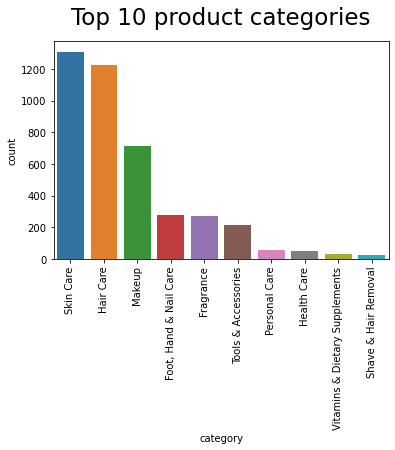

In [140]:
#I will use seaborn for my plots
bar_plot = sns.countplot(x='category',data=Amazon_beauty_data,order=pd.value_counts(Amazon_beauty_data['category']).iloc[:10].index)
bar_plot.set_title('Top 10 product categories', fontsize = 23, y =1.05)
bar_plot.set_xticklabels(bar_plot.get_xticklabels(),rotation = 90)

plt.show()

The most purchased product categories are Skin Care, Hair Care, Makeup. Hand & Nail Care and fragnance

In [151]:
Amazon_beauty_data["price"] = Amazon_beauty_data["price"].astype(float)

<AxesSubplot:xlabel='category', ylabel='price'>

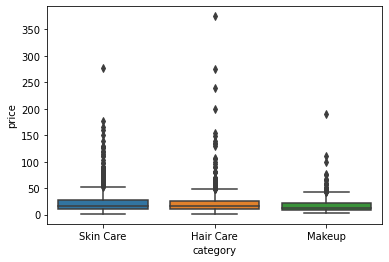

In [152]:
#Price Distribution within top three categories
sns.boxplot(y = Amazon_beauty_data['price'], x = Amazon_beauty_data['category'],order=["Skin Care", "Hair Care", "Makeup"])

The price of hair care category has a higher spread and the mean price of makeup category is comparatively lower

In [153]:
#Now I will break the data into three categories for further explortory analysis
Amazon_skincare=Amazon_beauty_data.loc[Amazon_beauty_data['category']=='Skin Care']
Amazon_haircare=Amazon_beauty_data.loc[Amazon_beauty_data['category']=='Hair Care']
Amazon_makeup=Amazon_beauty_data.loc[Amazon_beauty_data['category']=='Makeup']

In [154]:
Amazon_skincare.head(2)

,asin,helpful,Not helpful,review_concat,summary_concat,overall rating,name,category,description,price,rating,No_of_Rating
1,B004W75SLI,1.6,3.2,great mask clear skin never tried type mask re...,five star awesome improvement not clear enough...,5,Origins Clear Improvement Active Charcoal Mask...,Skin Care,Brand\n\n\nOrigins\n\n\n\n\nSkin Type\n\n\nAll...,14.25,4.5,1082
3,B003WNXZZO,3.8,5.6,unfortunately burn skinnormal rose water doesn...,unfortunately burn skin normal rose water not ...,1,"Shea Terra Organics Beauty Water, Toner & Face...",Skin Care,"Ingredients\n\n\nPure Moroccan rose water, Est...",15.75,4.3,120


In [155]:
Amazon_haircare.head(2)

,asin,helpful,Not helpful,review_concat,summary_concat,overall rating,name,category,description,price,rating,No_of_Rating
6,B00H7NKNE6,0.2,0.5,love 100 pure oil recently started getting ess...,great natural alternative shiny hair great cut...,5,Pure EXTRA Virgin Organic Argan Oil - USDA Cer...,Hair Care,Special Ingredients\n\n\nArgan Oil\n\n\n\n\nIt...,26.95,4.6,2600
7,B00HAT8EKW,0.1,0.1,hard water dry climate exposed new mexico scal...,soft shine marvelous moroccan used along condi...,5,Tru Moroccan- Moroccan Oil Shampoo-Best Morocc...,Hair Care,Brand\n\n\nTru Moroccan\n\n\n\n\nScent\n\n\nLi...,20.00,4.0,463


In [156]:
Amazon_makeup.head(2)

,asin,helpful,Not helpful,review_concat,summary_concat,overall rating,name,category,description,price,rating,No_of_Rating
29,B005FYJB92,0.7,0.8,beautiful color nice consistency item exactly ...,five star not nude not good shade red great pr...,5,"NYX Matte Lipstick, Nude",Makeup,Brand\n\n\nNYX PROFESSIONAL MAKEUP\n\n\n\n\nIn...,6.0,4.3,17678
30,B0019IVEEI,0.6,0.7,perfect color contouring ashybrownno orange pu...,perfect color contouring ashybrownno orange wo...,5,theBalm Bahama Mama Bronzer,Makeup,Color\n\n\nNatural Matte\n\n\n\n\nBrand\n\n\nT...,20.0,4.7,1433


Text(0.5, 0, 'Price')

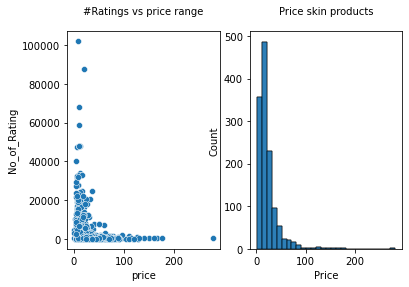

In [157]:
#I will look at the prices of top most sold products in each category, The number of ratings gives an idea of how many people
#purchased the product
fig,axes = plt.subplots(1,2)
skin_price_ratings = sns.histplot(x = Amazon_skincare['price'], binwidth = 10, ax = axes[1])
skin_price_ratings = sns.scatterplot(x='price', y='No_of_Rating', data=Amazon_skincare,ax = axes[0])
skin_price_ratings.set_title('#Ratings vs price range', fontsize = 10, y =1.05)
skin_price = sns.histplot(x = Amazon_skincare['price'], binwidth = 10, ax = axes[1])
skin_price.set_title('Price skin products', fontsize = 10, y =1.05)
skin_price.set_xlabel("Price", fontsize = 10)


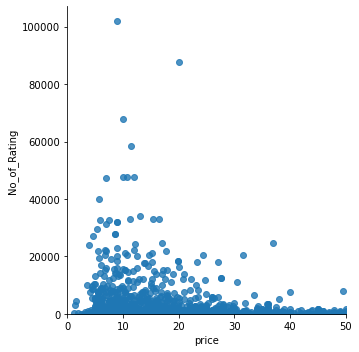

In [158]:
# basic scatterplot
sns.lmplot( x="price", y="No_of_Rating", data=Amazon_skincare, fit_reg=False)
 
# control x and y limits
plt.ylim(0, None)
plt.xlim(0, 50)
 
plt.show()

The price Analysis of skin products
1. Most purchased products are in the price range 10-20
2. Most number of products are between 10-20$   

In skin care category, for expensive products People prefer to go to a store and physically test the product before purchasing. So most products are listed below $50 which is also the range that maximum customers invest on.

Text(0.5, 0, 'Price')

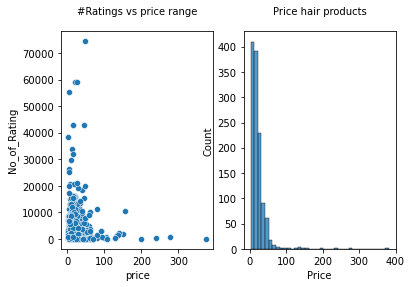

In [159]:
fig,axes = plt.subplots(1,2)
hair_price_ratings = sns.scatterplot(x='price', y='No_of_Rating', data=Amazon_haircare, ax = axes[0])
hair_price_ratings.set_title('#Ratings vs price range', fontsize = 10, y =1.05)
hair_price= sns.histplot(x = Amazon_haircare['price'], binwidth=10, ax = axes[1])
hair_price.set_title('Price hair products', fontsize = 10, y =1.05)
hair_price.set_xlabel("Price", fontsize = 10)

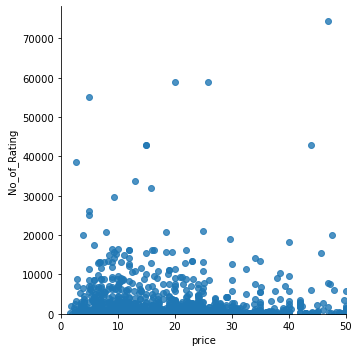

In [160]:
# basic scatterplot
sns.lmplot( x="price", y="No_of_Rating", data=Amazon_haircare, fit_reg=False)
 
# control x and y limits
plt.ylim(0, None)
plt.xlim(0, 50)
 
plt.show()

The price analysis of hair products 
Maximum products are listed between $0-30 but on average people spend slightly more money on hair products compared to skin products. 
More products in the range of $30-40 can be listed

Text(0.5, 0, 'Price')

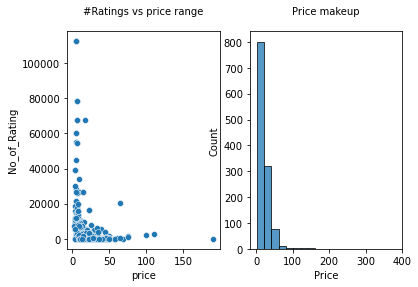

In [162]:
fig,axes = plt.subplots(1,2)
hair_price_ratings = sns.scatterplot(x='price', y='No_of_Rating', data=Amazon_makeup, ax = axes[0])
hair_price_ratings.set_title('#Ratings vs price range', fontsize = 10, y =1.05)
hair_price= sns.histplot(x = Amazon_haircare['price'], binwidth=20, ax = axes[1])
hair_price.set_title('Price makeup', fontsize = 10, y =1.05)
hair_price.set_xlabel("Price", fontsize = 10)

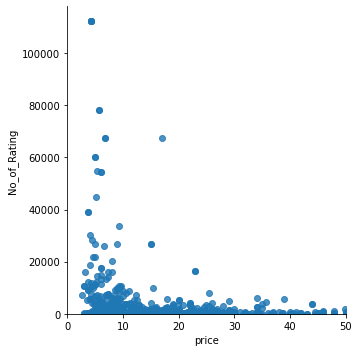

In [163]:
# basic scatterplot
sns.lmplot( x="price", y="No_of_Rating", data=Amazon_makeup, fit_reg=False)
 
# control x and y limits
plt.ylim(0, None)
plt.xlim(0, 50)
 
plt.show()

Analysis of Makeup Products
Like skincare product, people tend to spend less on makeup product online
Most purchased products are under $10 also most listed products are under $10.

Change in Rating from 2014 to 2021 (6 years)

I had the rating dataset from 2014 and I scraped the ratings from 2021

I will first see the drop or rise in ratings and do the sentiment analysis to understand the root cause of the change for top 10 rise and top 10 drops in each category

In [164]:
Amazon_skincare.head(2)

,asin,helpful,Not helpful,review_concat,summary_concat,overall rating,name,category,description,price,rating,No_of_Rating
1,B004W75SLI,1.6,3.2,great mask clear skin never tried type mask re...,five star awesome improvement not clear enough...,5,Origins Clear Improvement Active Charcoal Mask...,Skin Care,Brand\n\n\nOrigins\n\n\n\n\nSkin Type\n\n\nAll...,14.25,4.5,1082
3,B003WNXZZO,3.8,5.6,unfortunately burn skinnormal rose water doesn...,unfortunately burn skin normal rose water not ...,1,"Shea Terra Organics Beauty Water, Toner & Face...",Skin Care,"Ingredients\n\n\nPure Moroccan rose water, Est...",15.75,4.3,120


In [165]:
#Skincare products
Amazon_skincare = Amazon_skincare.set_index('asin')
Amazon_skincare['Delta'] = Amazon_skincare['rating'] - Amazon_skincare['overall rating']

- I added another column delta to see the change in rating within last 6 years
- Next I will pict the top 10 rise and top 10 drops in this category

In [167]:
Amazon_skincare.head(2)

,helpful,Not helpful,review_concat,summary_concat,overall rating,name,category,description,price,rating,No_of_Rating,Delta
asin,,,,,,,,,,,,
B004W75SLI,1.6,3.2,great mask clear skin never tried type mask re...,five star awesome improvement not clear enough...,5,Origins Clear Improvement Active Charcoal Mask...,Skin Care,Brand\n\n\nOrigins\n\n\n\n\nSkin Type\n\n\nAll...,14.25,4.5,1082,-0.5
B003WNXZZO,3.8,5.6,unfortunately burn skinnormal rose water doesn...,unfortunately burn skin normal rose water not ...,1,"Shea Terra Organics Beauty Water, Toner & Face...",Skin Care,"Ingredients\n\n\nPure Moroccan rose water, Est...",15.75,4.3,120,3.3


In [168]:
Delta_top10_rise_skin = Amazon_skincare.sort_values('Delta', ascending=False).head(10)

In [169]:
Delta_last10_drop_skin = Amazon_skincare.sort_values(['Delta'], ascending=True).head(10)

In [170]:
Delta_top10_rise_skin.head(1)

,helpful,Not helpful,review_concat,summary_concat,overall rating,name,category,description,price,rating,No_of_Rating,Delta
asin,,,,,,,,,,,,
B000RGBWPO,1.7,2.0,used cocoa butter never allergic stuff gave ho...,allergic like wonderful dry skin smell fantast...,1,Palmer's Cocoa Butter Formula Daily Skin Thera...,Skin Care,"Special Ingredients\n\n\nCocoa Butter, Vitamin...",6.64,4.8,13330,3.8


[Text(0, 0, "Palmer's Cocoa Butter Formula Daily Skin Therapy Solid Lotion, 7.25 Ounces"),
 Text(1, 0, 'Neutrogena The Transparent Facial Bar Original Formula 3.5 Ounce (Value Pack of 8)'),
 Text(2, 0, 'EltaMD UV Sport Sunscreen Lotion, Broad-Spectrum SPF 50, Non-Greasy, Mineral-Based Zinc Oxide Formula, Water-Resistant'),
 Text(3, 0, 'Tea Tree Hair and Body Moisturizer, Leave-In Conditioner, Body Lotion, After-Shave Cream'),
 Text(4, 0, 'La Roche-Posay Anthelios Light Fluid Face Sunscreen Broad Spectrum SPF 60, Oxybenzone Free, Non Greasy, Non-Comedogenic, 1.7 Fl. Oz. (Packaging may vary)'),
 Text(5, 0, 'Obagi Medical Hydrate Facial Moisturizer'),
 Text(6, 0, 'Avalon Organics Intense Defense Renewal Cream, 2 oz. (Pack of 2)'),
 Text(7, 0, 'Aveeno Clear Complexion Salicylic Acid Acne-Fighting Daily Face Moisturizer for Breakout-Prone Skin & Uneven Tone, Total Soy Complex, Oil-Free, Hypoallergenic & Non-Comedogenic, 4 fl. oz'),
 Text(8, 0, 'Face Moisturizer by Olay, Active Hydrating Bea

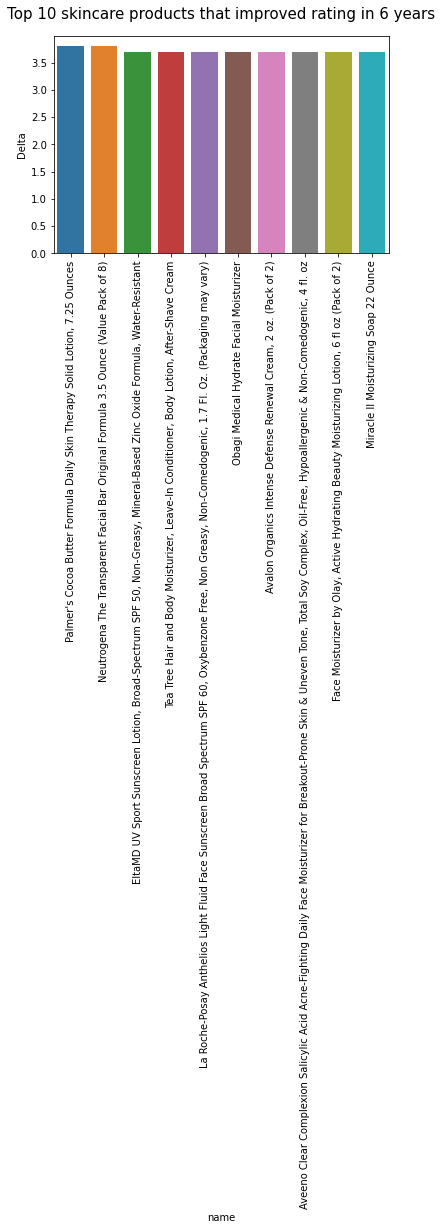

In [171]:
#Top 10 skincare products that improved ratings in 6 years
Top_10_plt =sns.barplot(x = Delta_top10_rise_skin['name'], y = Delta_top10_rise_skin['Delta'])
Top_10_plt.set_title('Top 10 skincare products that improved rating in 6 years', fontsize = 15, y =1.05)
Top_10_plt.set_xticklabels(Top_10_plt.get_xticklabels(),rotation = 90)


In [172]:
Delta_last10_drop_skin.head(1)

,helpful,Not helpful,review_concat,summary_concat,overall rating,name,category,description,price,rating,No_of_Rating,Delta
asin,,,,,,,,,,,,
B00EQBYSH0,1.5,4.0,indian ginseng cellulite cream amazing work wo...,amazing read ingredient lid flavor work natura...,5,"Moroccan Mint Scented Anti Cellulite Cream, 4 ...",Skin Care,Item Form\n\n\nCream\n\n\n\n\nBrand\n\n\nDiva ...,10.99,3.4,34,-1.6


[Text(0, 0, 'Moroccan Mint Scented Anti Cellulite Cream, 4 oz,with Indian Ginseng, Oregano, Horsetail, Juniper Berry, Coffee, Caffeine and More,By Diva Stuff'),
 Text(1, 0, 'Dove, Cr√®me Mousse Body Wash, Rich and Creamy, Sensitive Skin, 18 ounce'),
 Text(2, 0, 'NESURA Charcoal Pore Strips Black Head Remover 8 pcs'),
 Text(3, 0, 'vbeaut√© Eye Never Nourishing DNA Repair Eye Cr√®me.5 Ounce'),
 Text(4, 0, 'Coretex SunX SPF30 Sunscreen with Towelettes - 25 Individual Foil Pouches with 25 Individual Towelettes/Box, PABA Free, Oil-free, Water and Sweat Resistant, UVA/UVB Protection'),
 Text(5, 0, '3 Lbs of Raw Unrefined Shea Butter Grade A from Ghana'),
 Text(6, 0, 'Live Ultimate Camu Complex Antioxidant Rich Daily Moisturizer with White Oak & Chinese Basil Plant Stem Cells ‚Äì Shea Butter, Jojoba and Argan Oil Facial Creme ‚Äì SIZE 1.7oz/48g'),
 Text(7, 0, "NuElle Triple Action Anti Cellulite Concentrate, with Caffeine, L'Carnitine, CoQ10, Seaweed+; 25 Best Cellulite Fighting ingredients, 

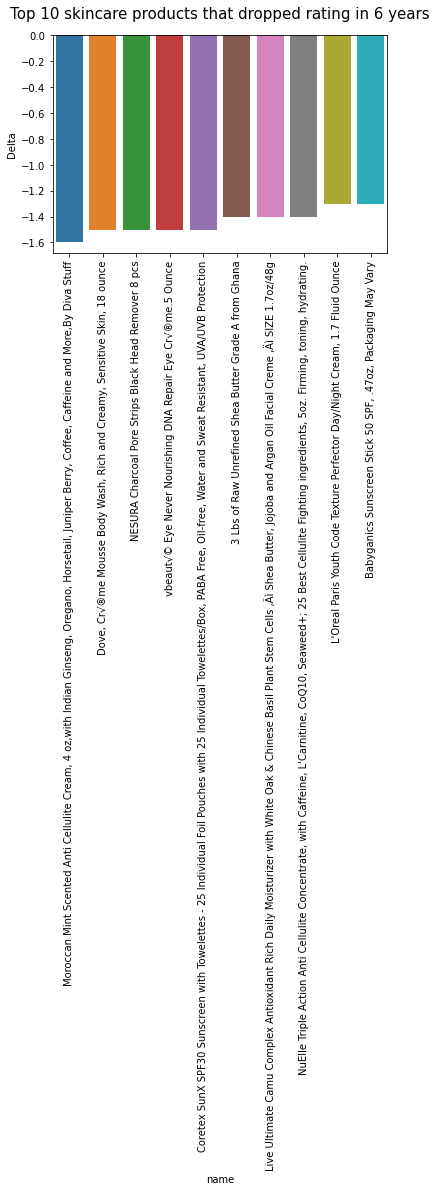

In [173]:
#Top 10 skincare products that dropped ratings in 6 years
Top_10_plt =sns.barplot(x = Delta_last10_drop_skin['name'], y = Delta_last10_drop_skin['Delta'])
Top_10_plt.set_title('Top 10 skincare products that dropped rating in 6 years', fontsize = 15, y =1.05)
Top_10_plt.set_xticklabels(Top_10_plt.get_xticklabels(),rotation = 90)

Similarly I will look for the drops in hair care and makeup category and scrape the current reviews for all 60 products for sentiment analysis

In [174]:
Amazon_haircare.head()

,asin,helpful,Not helpful,review_concat,summary_concat,overall rating,name,category,description,price,rating,No_of_Rating
6,B00H7NKNE6,0.2,0.5,love 100 pure oil recently started getting ess...,great natural alternative shiny hair great cut...,5,Pure EXTRA Virgin Organic Argan Oil - USDA Cer...,Hair Care,Special Ingredients\n\n\nArgan Oil\n\n\n\n\nIt...,26.95,4.6,2600
7,B00HAT8EKW,0.1,0.1,hard water dry climate exposed new mexico scal...,soft shine marvelous moroccan used along condi...,5,Tru Moroccan- Moroccan Oil Shampoo-Best Morocc...,Hair Care,Brand\n\n\nTru Moroccan\n\n\n\n\nScent\n\n\nLi...,20.00,4.0,463
8,B00HNKRWX8,0.1,0.3,using clear scalp hair intense hydration nouri...,like conditioner fair good work fine far good ...,2,"Clear Treatment Mask, Intense Hydration 6 oz",Hair Care,Brand\n\n\nCLEAR HAIR\n\n\n\n\nLiquid Volume\n...,22.99,3.6,46
12,B00I32AN4K,5.7,6.1,soon received mail excited second ripped plast...,omgi love stuff amazing dry hair argan oil mas...,5,Hydrating Argan Oil Hair Mask and Deep Conditi...,Hair Care,Brand\n\n\nArvazallia\n\n\n\n\nHair Type\n\n\n...,12.95,4.5,33688
14,B00H345TXO,0.7,0.9,nice styling wand anyone long hair minimal lay...,great long minimally layered hair hot awkward ...,5,Remington CI97M1A Ultimate Stylist Teardrop Wa...,Hair Care,Size\n\n\n1 Count (Pack of 1)\n\n\n\n\nColor\n...,18.70,4.0,75


In [175]:
#Haircare
Amazon_haircare = Amazon_haircare.set_index(['asin'])
Amazon_haircare['Delta'] = Amazon_haircare['rating'] - Amazon_haircare['overall rating']
Delta_top10_rise_hair = Amazon_haircare.sort_values('Delta', ascending=False).head(10)
Delta_last10_drop_hair = Amazon_haircare.sort_values('Delta', ascending=True).head(10)

In [176]:
Delta_top10_rise_hair.head(2)

,helpful,Not helpful,review_concat,summary_concat,overall rating,name,category,description,price,rating,No_of_Rating,Delta
asin,,,,,,,,,,,,
B002D4CXII,0.0,0.1,oil amazing smell delicious purchased oil seve...,hope always available best smoothing oil good ...,1,"Marrakesh Oil, Original - 2 fl. oz. - Morrocan...",Hair Care,Brand\n\n\nEarthly Body\n\n\n\n\nItem Form\n\n...,23.99,4.8,1139,3.8
B003JA3KDW,0.7,1.1,pantenes product tend colorcoded red curly hai...,not check name sure getting great even pantene...,1,"Pantene Pro-V Curl Perfection Conditioner, 12 ...",Hair Care,Brand\n\n\nPantene\n\n\n\n\nHair Type\n\n\nCur...,23.94,4.8,317,3.8


In [177]:
Delta_last10_drop_hair.head(2)

,helpful,Not helpful,review_concat,summary_concat,overall rating,name,category,description,price,rating,No_of_Rating,Delta
asin,,,,,,,,,,,,
B002KAGWYQ,1.1,1.6,overall happy purchase however r6 not dark ant...,rockn ponytail perfect match not fabulous fake...,5,"Hairdo Simply Straight Pony, R6 Dark Chocolate",Hair Care,Color\n\n\nR6 Dark Chocolate\n\n\n\n\nBrand\n\...,38.0,3.0,17,-2.0
B002GCKVJA,0.9,1.3,worn bang time got great review family friend ...,love look give cute best one price love fun gr...,5,Clip in Bangs Color R6/30H CHOCOLATE COPPER - ...,Hair Care,Color\n\n\nR6-30H\n\n\n\n\nBrand\n\n\nKen Pave...,30.6,3.1,79,-1.9


[Text(0, 0, 'Marrakesh Oil, Original - 2 fl. oz. - Morrocan Argan Oil, Hemp Seed Oil - Moisturize & Nourish Hair, Control Frizz, Increase Smoothness - Vegan & Cruelty-Free'),
 Text(1, 0, 'Pantene Pro-V Curl Perfection Conditioner, 12 FL OZ (Pack of 6)'),
 Text(2, 0, 'Pantene Pro-V Curl Perfection Moisture Renewal Shampoo, 12.6 FL OZ (Pack of 6)'),
 Text(3, 0, 'Moroccanoil Treatment Oil'),
 Text(4, 0, "It's a 10 Haircare Miracle Leave-In Lite 4, fl. oz. (Pack of 1)"),
 Text(5, 0, 'Moroccanoil Restorative Hair Mask'),
 Text(6, 0, 'Pantene Pro-V Classic Clean 2in1 Shampoo + Conditioner 25.4 Fl Oz (Pack of 2)'),
 Text(7, 0, 'Moroccanoil Intense Hydrating Hair Mask'),
 Text(8, 0, 'Nioxin System 1 Cleanser Shampoo for Natural Hair with Light Thinning, 33.8 oz'),
 Text(9, 0, "L'Oreal Excellence HiColor Red 1.2 oz")]

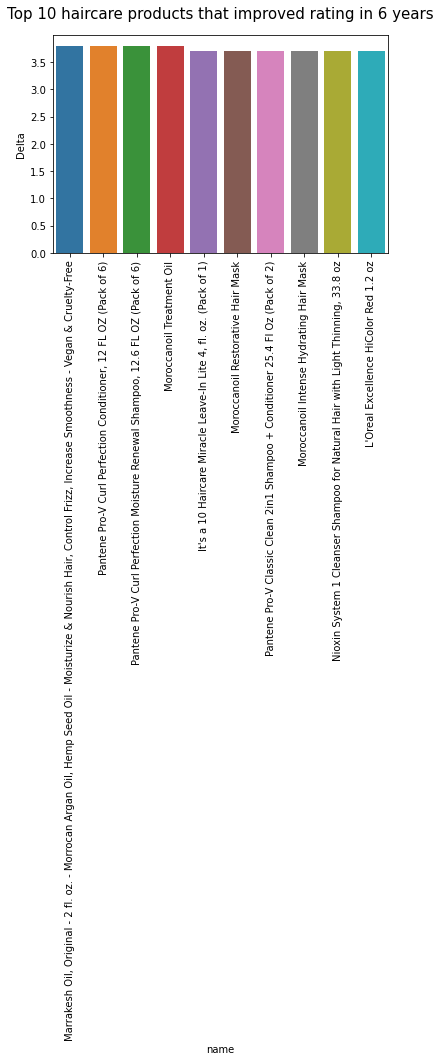

In [178]:
#Top 10 haircare products that improved ratings in 6 years
Top_10_plt =sns.barplot(x = Delta_top10_rise_hair['name'], y = Delta_top10_rise_hair['Delta'])
Top_10_plt.set_title('Top 10 haircare products that improved rating in 6 years', fontsize = 15, y =1.05)
Top_10_plt.set_xticklabels(Top_10_plt.get_xticklabels(),rotation = 90)


[Text(0, 0, 'Hairdo Simply Straight Pony, R6 Dark Chocolate'),
 Text(1, 0, 'Clip in Bangs Color R6/30H CHOCOLATE COPPER - Hairdo Extensions 9.5" Length Heat Friendly Synthetic Hairpiece Add Bang Fringe'),
 Text(2, 0, 'Nexxus Sleek Memory Straightening Smoothing Spray -- 7.5 oz.'),
 Text(3, 0, 'Vidal Sassoon Pro Series 1 Inch Touch Control Digital Straightener'),
 Text(4, 0, 'Essence of Argan Renewing Hair Care Products Infused with 100% Pure Moroccan Organic Argan Oil - Volumizes, Nourishes and Heals Your Hair - All Hair Types (Conditioner)'),
 Text(5, 0, 'Essence of Argan Renewing Shampoo Infused with 100% Pure Moroccan Organic Argan Oil - Volumizes, Nourishes and Heals Your Hair - All Hair Types (355ml/12oz)'),
 Text(6, 0, 'Essence of Argan Renewing Deep Conditioning Hair Mask Infused with 100% Pure Moroccan Organic Argan Oil - Hydrating Hair Mask - All Hair Types (236ml/8oz)'),
 Text(7, 0, 'Suave Kids 2 in 1 Shampoo and Conditioner, Coconut Smoothers, 22.5 oz'),
 Text(8, 0, 'Vive Pr

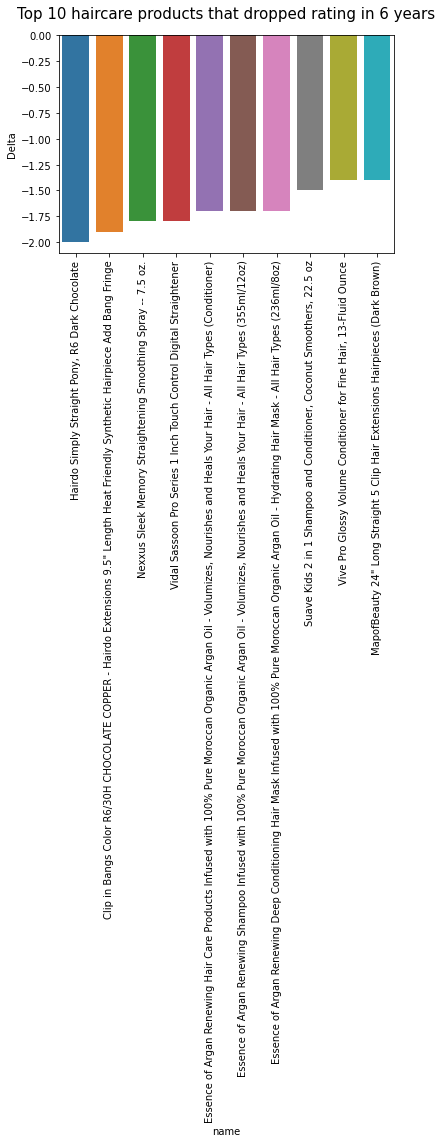

In [179]:
#Top 10 haircare products that dropped ratings in 6 years
Top_10_plt =sns.barplot(x = Delta_last10_drop_hair['name'], y = Delta_last10_drop_hair['Delta'])
Top_10_plt.set_title('Top 10 haircare products that dropped rating in 6 years', fontsize = 15, y =1.05)
Top_10_plt.set_xticklabels(Top_10_plt.get_xticklabels(),rotation = 90)

In [180]:
#Makeup
Amazon_makeup = Amazon_makeup.set_index(['asin'])
Amazon_makeup['Delta'] = Amazon_makeup['rating'] - Amazon_makeup['overall rating']
Delta_top10_rise_makeup = Amazon_makeup.sort_values('Delta', ascending=False).head(10)
Delta_last10_drop_makeup = Amazon_makeup.sort_values('Delta', ascending=True).head(10)

In [181]:
Delta_top10_rise_makeup.head(2)

,helpful,Not helpful,review_concat,summary_concat,overall rating,name,category,description,price,rating,No_of_Rating,Delta
asin,,,,,,,,,,,,
B005O54SVS,1.2,1.9,honestly wanted love stuff seeing product loca...,not see fuss shrink pore love good primer love...,1,Photo Finish Foundation Primer by Smashbox for...,Makeup,Brand\n\n\nSmashbox\n\n\n\n\nIngredients\n\n\n...,29.0,4.7,1464,3.7
B00396VE7U,5.1,5.7,really like concept function formula product o...,dark pale skin tone would without definitely o...,1,Revision Skincare Intellishade Original Tinted...,Makeup,Ingredients\n\n\nActive Ingredients Octinoxate...,76.0,4.7,1853,3.7


In [182]:
Delta_last10_drop_makeup.head()

,helpful,Not helpful,review_concat,summary_concat,overall rating,name,category,description,price,rating,No_of_Rating,Delta
asin,,,,,,,,,,,,
B002R278YA,0.0,0.0,lip liner pencil arrived brand new perfect con...,excellent quality simple cute thumb smooth mov...,5,NYX Slim Lip Liner Pencil - Latte - SLP 847,Makeup,Brand\n\n\nPROFESSIONALNYXMAKEUP\n\n\n\n\nItem...,5.99,2.8,35,-2.2
B00C64GX9U,1.5,1.8,not think melted caramel belongs 34flamed out3...,love cg flamed collection nice shadow pencil f...,5,COVERGIRL Flamed Out Shadow Pencil Ashen Glow ...,Makeup,Brand\n\n\nCOVERGIRL\n\n\n\n\nItem Form\n\n\nP...,5.06,3.2,387,-1.8
B00FXW4GFU,3.8,5.3,love diva stuff product eyelash conditioner he...,notice difference long lash work five star las...,5,"New Formula! Diva Stuff Eyelash Conditioner, H...",Makeup,Brand\n\n\nDiva Stuff\n\n\n\n\nScent\n\n\nCoco...,13.49,3.3,188,-1.7
B007NXZ0T8,1.9,2.3,absolutely genius cruelty free vegan many colo...,obsessive right great pigment bright pretty bl...,5,Obsessive Compulsive Cosmetics Lip Tar - Inter...,Makeup,Brand\n\n\nObsessive Compulsive Cosmetics\n\n\...,44.52,3.4,45,-1.6
B0046EBOFG,1.7,1.9,like color deep red magenta undertonesi would ...,nice color woman colornice lip color good colo...,5,"Manic Panic Lip Locked Lipstick, Tainted Love,...",Makeup,Brand\n\n\nMANIC PANIC\n\n\n\n\nIngredients\n\...,7.90,3.4,83,-1.6


[Text(0, 0, 'Photo Finish Foundation Primer by Smashbox for Women - Transparent , 1 oz Primer'),
 Text(1, 0, 'Revision Skincare Intellishade Original Tinted Moisturizer SPF 45, 1.7 oz'),
 Text(2, 0, 'Mary Kay¬Æ Ultimate Mascara‚Ñ¢: Black, 0.28 oz'),
 Text(3, 0, 'Benefit Cosmetics the POREfessional Pore Minimizing Face Primer 0.75 Ounce'),
 Text(4, 0, 'Benefit Cosmetics Benetint Rose Tinted Lip & Cheek Stain, 0.33 Ounce'),
 Text(5, 0, 'ALMAY Intense I-Color Shimmer-I Kit, Brown'),
 Text(6, 0, 'bareMinerals Brow Color, Ash Blonde/Pale, 0.01 Ounce'),
 Text(7, 0, 'Maybelline New York Volume Express Colossal Cat Eyes Washable Mascara, Glam Black, 0.31 Fluid Ounce'),
 Text(8, 0, 'COVERGIRL and Olay Tonerehab 2-In-1 Foundation, Classic Tan 160, 1 Fluid Ounce'),
 Text(9, 0, 'NYX PROFESSIONAL MAKEUP Makeup Setting Spray, Matte Finish , 2.03 Fl Oz (Pack of 1)')]

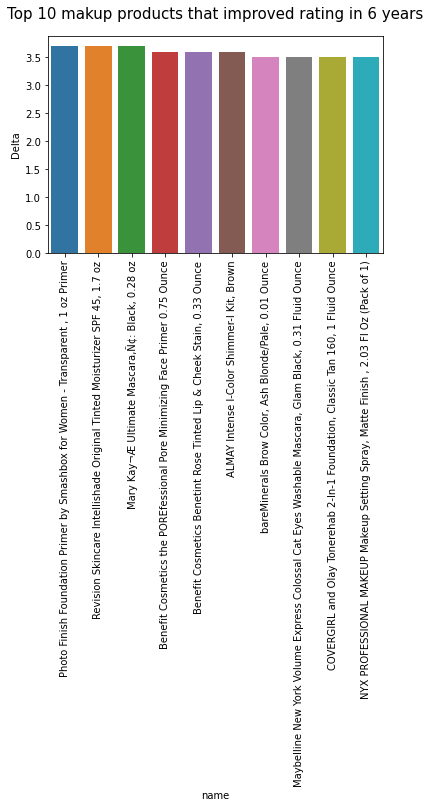

In [183]:
#Top 10 makeup products that improved ratings in 6 years
Top_10_plt =sns.barplot(x = Delta_top10_rise_makeup['name'], y = Delta_top10_rise_makeup['Delta'])
Top_10_plt.set_title('Top 10 makup products that improved rating in 6 years', fontsize = 15, y =1.05)
Top_10_plt.set_xticklabels(Top_10_plt.get_xticklabels(),rotation = 90)

[Text(0, 0, 'NYX Slim Lip Liner Pencil - Latte - SLP 847'),
 Text(1, 0, 'COVERGIRL Flamed Out Shadow Pencil Ashen Glow Flame 335, .08 oz, Old Version (packaging may vary)'),
 Text(2, 0, 'New Formula! Diva Stuff Eyelash Conditioner, Helps Promote Long, Thick,Dark,& Healthy Lashes Naturally'),
 Text(3, 0, 'Obsessive Compulsive Cosmetics Lip Tar - Interlace'),
 Text(4, 0, 'Manic Panic Lip Locked Lipstick, Tainted Love, 0.11 Ounce'),
 Text(5, 0, 'COVERGIRL Lineexact Liquid Eyeliner Black Brown 620, 0.02 Oz'),
 Text(6, 0, 'Maybelline Instant Age Rewind Foundation SPF18 Sandy Beige (Medium 1)'),
 Text(7, 0, '100% PURE Bamboo Blur Tinted Moisturizer, Toffee, Matte Foundation, Medium Coverage, Anti-Aging, Lightweight, Hydrating Vegan Makeup (Tan Shade w/ Neutral Undertone) - 1.69 Fl Oz'),
 Text(8, 0, 'Christian Charcoal Eyebrow Kit'),
 Text(9, 0, 'NYX Jumbo Lip Pencil 722 Hera')]

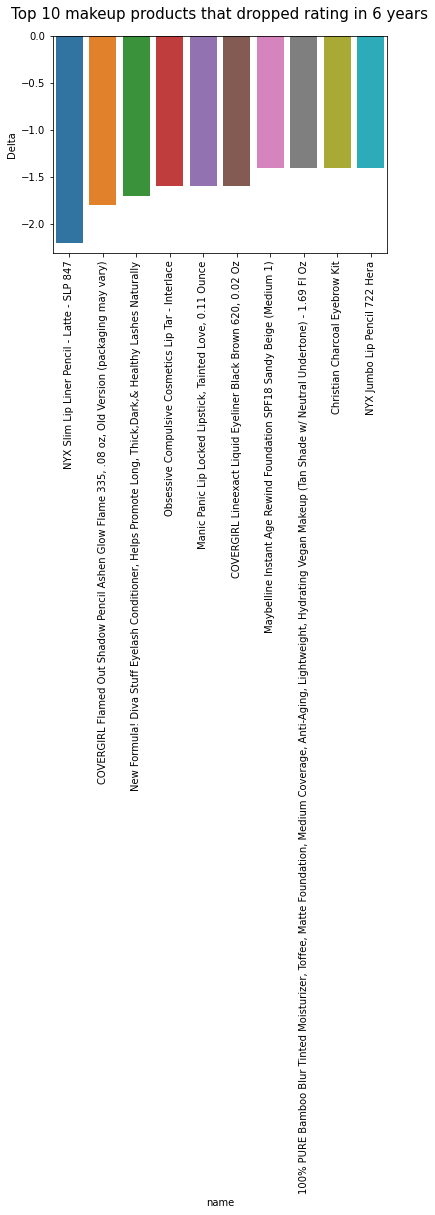

In [184]:
#Top 10 haircare products that dropped ratings in 6 years
Top_10_plt =sns.barplot(x = Delta_last10_drop_makeup['name'], y = Delta_last10_drop_makeup['Delta'])
Top_10_plt.set_title('Top 10 makeup products that dropped rating in 6 years', fontsize = 15, y =1.05)
Top_10_plt.set_xticklabels(Top_10_plt.get_xticklabels(),rotation = 90)

I will write these files into csv and scrape the current reviews to do a sentiment analysis and see what is going on

In [185]:
#Writing top 10 skincare products that improved rating
Delta_top10_rise_skin.to_csv('Delta_top10_rise_skin.csv')
Delta_last10_drop_skin.to_csv('Delta_last10_drop_skin.csv')
Delta_top10_rise_hair.to_csv('Delta_top10_rise_hair.csv')
Delta_last10_drop_hair.to_csv('Delta_last10_drop_hair.csv')
Delta_top10_rise_makeup.to_csv('Delta_top10_rise_makeup.csv')
Delta_last10_drop_makeup.to_csv('Delta_last10_drop_makeup.csv')

In the next set of code I will scrape the current reviews for all these 60 products for final analysis

In [186]:
#Reading the 6 files, 2 from each category into pandas dataframe
Delta_top10_rise_skin = pd.read_csv('Delta_top10_rise_skin.csv')
Delta_last10_drop_skin = pd.read_csv('Delta_last10_drop_skin.csv')
Delta_top10_rise_hair = pd.read_csv('Delta_top10_rise_hair.csv')
Delta_last10_drop_hair = pd.read_csv('Delta_last10_drop_hair.csv')
Delta_top10_rise_makeup = pd.read_csv('Delta_top10_rise_makeup.csv')
Delta_last10_drop_makeup = pd.read_csv('Delta_last10_drop_makeup.csv')

In [187]:
Delta_top10_rise_skin.head(2)

,asin,helpful,Not helpful,review_concat,summary_concat,overall rating,name,category,description,price,rating,No_of_Rating,Delta
0,B000RGBWPO,1.7,2.0,used cocoa butter never allergic stuff gave ho...,allergic like wonderful dry skin smell fantast...,1,Palmer's Cocoa Butter Formula Daily Skin Thera...,Skin Care,"Special Ingredients\n\n\nCocoa Butter, Vitamin...",6.64,4.8,13330,3.8
1,B001E96N48,0.4,0.6,really oily skin saw soap mentioned dr oz deci...,love love love face made face dry peel ok bad ...,1,Neutrogena The Transparent Facial Bar Original...,Skin Care,Item Form\n\n\nBar\n\n\n\n\nBrand\n\n\nNeutrog...,24.45,4.8,217,3.8


In [188]:
Delta_last10_drop_skin.head(2)

,asin,helpful,Not helpful,review_concat,summary_concat,overall rating,name,category,description,price,rating,No_of_Rating,Delta
0,B00EQBYSH0,1.5,4.0,indian ginseng cellulite cream amazing work wo...,amazing read ingredient lid flavor work natura...,5,"Moroccan Mint Scented Anti Cellulite Cream, 4 ...",Skin Care,Item Form\n\n\nCream\n\n\n\n\nBrand\n\n\nDiva ...,10.99,3.4,34,-1.6
1,B00604MSSC,0.7,1.7,using body wash two week caused horrible break...,horrible breakout really itchy skin nice produ...,5,"Dove, Cr√®me Mousse Body Wash, Rich and Creamy...",Skin Care,Item Form\n\n\nMousse\n\n\n\n\nBrand\n\n\nDove...,76.99,3.5,54,-1.5


Scraping the current reviews for these products

In [189]:
from bs4 import BeautifulSoup
from requests import get
import requests

from selenium import webdriver

In [190]:
#Top 10 skincare product that improved ratings in 6 years
#Using the asin for scraping
asin_improve_skin = list(Delta_top10_rise_skin['asin'])

In [191]:
len(asin_improve_skin)

10

In [222]:
product_review = {}

#Start looping through the 10 asins
for i in asin_improve_skin:  
    
    # Print the urls at the beginning of each loop 
    print(f'https://www.amazon.com/gp/product/{i}')
    
    # Send webdriver to the url in the loop
    driver.get(f'https://www.amazon.com/gp/product/{i}')
    
    # Instantiate BeautifulSoup web scraper 
    soup = BeautifulSoup(driver.page_source, 'lxml')
    
    # Create an empty dictionary for each product with asin number i
    review_list = []
#     review_widget = soup.find('div', {'data-hook':'review-body'})
    reviews = soup.findAll('span',{'data-hook':'review-body'})
    number_of_top_reviews = len(reviews)
    print("Number of reviews ", number_of_top_reviews)
#     review = reviews.findAll('div',{'data-hook':'review-collapsed'})
#     pp.pprint(review)
    
    for j in range(number_of_top_reviews):
#         print("Success")
        review_collap = reviews[j].findAll('div',{'data-hook':'review-body'})
        review = review_collap[0].find('span').text.strip()
        review_list.append(review)
        
#         break
#     print("Length ",len(review_list))
    product_review[i] = review_list
    
#     break
pp.pprint(product_review)

https://www.amazon.com/gp/product/B000RGBWPO
Number of reviews  13


IndexError: list index out of range

In [193]:
#scraping reviews for each of these asins
def scrap_rev(lis):
    
    
    service = Service("/Users/minjae/Downloads/dav5400/Final\ Project/chromedriver")
    driver = webdriver.Chrome(service=service)



    dic = {}

    #Start looping through the 10 asins
    for i in lis:  

        # Print the urls at the beginning of each loop 
        print(f'https://www.amazon.com/gp/product/{i}')

        # Send webdriver to the url in the loop
        driver.get(f'https://www.amazon.com/gp/product/{i}')

        # Instantiate BeautifulSoup web scraper 
        soup = BeautifulSoup(driver.page_source, 'lxml')

        # Create an empty dictionary for each product with asin number i
        review_list = []
        review_widget = soup.find('div', {'data-hook':'top-customer-reviews-widget'})
        reviews = review_widget.findAll('div',{'data-hook':'review'})
        number_of_top_reviews = len(reviews)
        print("Number of reviews ", number_of_top_reviews)
  

        for j in range(number_of_top_reviews):
            review_collap = reviews[j].findAll('div',{'data-hook':'review-collapsed'})
            review = review_collap[0].find('span').text.strip()
            review_list.append(review)

   
        dic[i] = review_list
    return dic

 


In [194]:
#Creating the rest of list from dataframes
#Using the asin for scraping
asin_drop_skin = list(Delta_last10_drop_skin['asin'])
asin_improve_hair = list(Delta_top10_rise_hair['asin'])
asin_drop_hair = list(Delta_last10_drop_hair['asin'])
asin_improve_makeup = list(Delta_top10_rise_makeup['asin'])
asin_drop_makeup = list(Delta_last10_drop_makeup['asin'])

In [195]:
asin_improve_skin_dic = scrap_rev(asin_improve_skin)

https://www.amazon.com/gp/product/B000RGBWPO
Number of reviews  8
https://www.amazon.com/gp/product/B001E96N48
Number of reviews  8
https://www.amazon.com/gp/product/B001FYXA6G
Number of reviews  8
https://www.amazon.com/gp/product/B002FJ11UW
Number of reviews  8
https://www.amazon.com/gp/product/B002CML1XE
Number of reviews  8
https://www.amazon.com/gp/product/B00AAR9I60
Number of reviews  8
https://www.amazon.com/gp/product/B001ET78RE
Number of reviews  8
https://www.amazon.com/gp/product/B00006FRW7
Number of reviews  8
https://www.amazon.com/gp/product/B001F51T3Q
Number of reviews  8
https://www.amazon.com/gp/product/B000F7UUHQ
Number of reviews  8


In [198]:
#Rest 5 of the list
try:
    asin_drop_skin_dic = scrap_rev(asin_drop_skin)
except:
    pass
try:
    asin_improve_hair_dic = scrap_rev(asin_improve_hair)
except:
    pass
try:
    asin_drop_hair_dic = scrap_rev(asin_drop_hair)
except:
    pass
try:
    asin_improve_makeup_dic = scrap_rev(asin_improve_makeup)
except:
    pass
try:
    asin_drop_makeup_dic = scrap_rev(asin_drop_makeup)
except:
    pass

https://www.amazon.com/gp/product/B00EQBYSH0
Number of reviews  8
https://www.amazon.com/gp/product/B00604MSSC
Number of reviews  8
https://www.amazon.com/gp/product/B005ITRIOY
Number of reviews  8
https://www.amazon.com/gp/product/B0060HOOA4
Number of reviews  8
https://www.amazon.com/gp/product/B0006GBEYE
Number of reviews  8
https://www.amazon.com/gp/product/B002F17ZXW
Number of reviews  8
https://www.amazon.com/gp/product/B00L3LB0IG
Number of reviews  8
https://www.amazon.com/gp/product/B003UJHSUI
Number of reviews  3
https://www.amazon.com/gp/product/B00DG1B6V2
https://www.amazon.com/gp/product/B002D4CXII
Number of reviews  8
https://www.amazon.com/gp/product/B003JA3KDW
Number of reviews  8
https://www.amazon.com/gp/product/B003JA3KQE
Number of reviews  8
https://www.amazon.com/gp/product/B002Q6UK9M
Number of reviews  8
https://www.amazon.com/gp/product/B007L5H7XK
Number of reviews  8
https://www.amazon.com/gp/product/B002C4V3WG
Number of reviews  8
https://www.amazon.com/gp/produ

In [199]:
def convert_to_df(dic):    
    lis = []
    for k,v in dic.items():
        temp_dic ={}
        temp_dic['asin']=k
        temp_dic['review_2021'] = ' '.join(v)
        lis.append(temp_dic)
        df = pd.DataFrame(lis)
    return df
    #pp.pprint(asin_improve_skin_lis)


In [200]:
asin_improve_skin_df = convert_to_df(asin_improve_skin_dic)

In [201]:
asin_improve_skin_df.head(5)

,asin,review_2021
0,B000RGBWPO,My face is extremely dry and this is the first...
1,B001E96N48,"Pure and gentle, it removes excess oil from yo..."
2,B001FYXA6G,Buy this! I have very sensitive skin and no lo...
3,B002FJ11UW,I have had a hit and miss relationship with th...
4,B002CML1XE,Last summer I decided I was going to find the ...


In [202]:
asin_drop_skin_df = convert_to_df(asin_drop_skin_dic)
asin_improve_hair_df = convert_to_df(asin_improve_hair_dic)
asin_drop_hair_df = convert_to_df(asin_drop_hair_dic)
asin_improve_makeup_df = convert_to_df(asin_improve_makeup_dic)
asin_drop_makeup_df = convert_to_df(asin_drop_makeup_dic)

NameError: name 'asin_drop_skin_dic' is not defined

In [203]:
#I will now merge these dataframes to my existing dataframes for each category and then clean the data for sentiment analysis
#Delta_top10_rise_skin merged with asin_improve_skin_df 

skincare_improved = pd.merge(Delta_top10_rise_skin, asin_improve_skin_df, how ='inner', on ='asin')
skincare_dropped = pd.merge(Delta_last10_drop_skin, asin_drop_skin_df, how ='inner', on ='asin')

haircare_improved = pd.merge(Delta_top10_rise_hair, asin_improve_hair_df, how ='inner', on ='asin')
haircare_dropped = pd.merge(Delta_last10_drop_hair, asin_drop_hair_df, how ='inner', on ='asin')

makeup_improved = pd.merge(Delta_top10_rise_makeup, asin_improve_makeup_df, how ='inner', on ='asin')
makeup_dropped = pd.merge(Delta_last10_drop_makeup, asin_drop_makeup_df, how ='inner', on ='asin')


NameError: name 'asin_drop_skin_df' is not defined

In [204]:
skincare_improved.head(1)

,asin,helpful,Not helpful,review_concat,summary_concat,overall rating,name,category,description,price,rating,No_of_Rating,Delta,review_2021
0,B000RGBWPO,1.7,2.0,used cocoa butter never allergic stuff gave ho...,allergic like wonderful dry skin smell fantast...,1,Palmer's Cocoa Butter Formula Daily Skin Thera...,Skin Care,"Special Ingredients\n\n\nCocoa Butter, Vitamin...",6.64,4.8,13330,3.8,My face is extremely dry and this is the first...


In [205]:
skincare_dropped.head(1)

NameError: name 'skincare_dropped' is not defined

In [206]:
skincare_dropped.head(1)

NameError: name 'skincare_dropped' is not defined

In [207]:
makeup_dropped.head(1)

NameError: name 'makeup_dropped' is not defined

# Preprocessing the new reviews

1. convert all text to lower case
2. Replace empty spaces with one space
3. Expand Contraction, this will expand the short form of words (eg: havent to not)
4. Filtering punctuation as it does not add any value to NLP
4. Filtering stopwords
6. Expand Contraction, this will expand the short form of words (eg: mgmnt to management)
7. Lemmetization: To find the root words

In [208]:
#converting to lowercase
skincare_improved['review_2021'] = skincare_improved['review_2021'].str.lower()
skincare_dropped['review_2021'] = skincare_dropped['review_2021'].str.lower()
haircare_improved['review_2021'] = haircare_improved['review_2021'].str.lower()
haircare_dropped['review_2021'] = haircare_dropped['review_2021'].str.lower()
makeup_improved['review_2021'] = makeup_improved['review_2021'].str.lower()
makeup_dropped['review_2021'] = makeup_dropped['review_2021'].str.lower()

NameError: name 'skincare_dropped' is not defined

In [209]:
#Replace empty spaces with one space
skincare_improved['review_2021'] = skincare_improved['review_2021'].apply(lambda x: re.sub('\s+', ' ', x))
skincare_dropped['review_2021'] = skincare_dropped['review_2021'].apply(lambda x: re.sub('\s+', ' ', x))
haircare_improved['review_2021'] = haircare_improved['review_2021'].apply(lambda x: re.sub('\s+', ' ', x))
haircare_dropped['review_2021'] = haircare_dropped['review_2021'].apply(lambda x: re.sub('\s+', ' ', x))
makeup_improved['review_2021'] = makeup_improved['review_2021'].apply(lambda x: re.sub('\s+', ' ', x))
makeup_dropped['review_2021'] = makeup_dropped['review_2021'].apply(lambda x: re.sub('\s+', ' ', x))


NameError: name 'skincare_dropped' is not defined

In [210]:
#Expand Contraction
import contractions
skincare_improved['review_2021'] = skincare_improved['review_2021'].apply(lambda x: contractions.fix(x))
skincare_dropped['review_2021'] = skincare_dropped['review_2021'].apply(lambda x: contractions.fix(x))
haircare_improved['review_2021'] = haircare_improved['review_2021'].apply(lambda x: contractions.fix(x))
haircare_dropped['review_2021'] = haircare_dropped['review_2021'].apply(lambda x: contractions.fix(x))
makeup_improved['review_2021'] = makeup_improved['review_2021'].apply(lambda x: contractions.fix(x))
makeup_dropped['review_2021'] = makeup_dropped['review_2021'].apply(lambda x: contractions.fix(x))

NameError: name 'skincare_dropped' is not defined

In [211]:
#Filtering punctuation
skincare_improved['review_2021'] = skincare_improved['review_2021'].apply(lambda x: re.sub('[^\w\s]', '', x))
skincare_dropped['review_2021'] = skincare_dropped['review_2021'].apply(lambda x: re.sub('[^\w\s]', '', x))
haircare_improved['review_2021'] = haircare_improved['review_2021'].apply(lambda x: re.sub('[^\w\s]', '', x))
haircare_dropped['review_2021'] = haircare_dropped['review_2021'].apply(lambda x: re.sub('[^\w\s]', '', x))
makeup_improved['review_2021'] = makeup_improved['review_2021'].apply(lambda x: re.sub('[^\w\s]', '', x))
makeup_dropped['review_2021'] = makeup_dropped['review_2021'].apply(lambda x: re.sub('[^\w\s]', '', x))


NameError: name 'skincare_dropped' is not defined

In [212]:
#Filtering stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
#We want to differentiate between not impressed and impressed. No and not are stopwords but we dnt want to remove
# them from our text. I will remove no and not from stop words
stop.remove('no')
stop.remove('not')

skincare_improved['review_2021'] = skincare_improved['review_2021'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))
skincare_dropped['review_2021'] = skincare_dropped['review_2021'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))
haircare_improved['review_2021'] = haircare_improved['review_2021'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))
haircare_dropped['review_2021'] = haircare_dropped['review_2021'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))
makeup_improved['review_2021'] = makeup_improved['review_2021'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))
makeup_dropped['review_2021'] = makeup_dropped['review_2021'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))



NameError: name 'skincare_dropped' is not defined

In [213]:
#Lemmetization
from nltk import WordNetLemmatizer

lemztr = WordNetLemmatizer()

skincare_improved['review_2021'] = skincare_improved['review_2021'].apply(lambda text: ' '.join([lemztr.lemmatize(word) for word in text.split()]))
skincare_dropped['review_2021'] = skincare_dropped['review_2021'].apply(lambda text: ' '.join([lemztr.lemmatize(word) for word in text.split()]))
haircare_improved['review_2021'] = haircare_improved['review_2021'].apply(lambda text: ' '.join([lemztr.lemmatize(word) for word in text.split()]))
haircare_dropped['review_2021'] = haircare_dropped['review_2021'].apply(lambda text: ' '.join([lemztr.lemmatize(word) for word in text.split()]))
makeup_improved['review_2021'] = makeup_improved['review_2021'].apply(lambda text: ' '.join([lemztr.lemmatize(word) for word in text.split()]))
makeup_dropped['review_2021'] = makeup_dropped['review_2021'].apply(lambda text: ' '.join([lemztr.lemmatize(word) for word in text.split()]))



NameError: name 'skincare_dropped' is not defined

# Sentiment Analysis

In [214]:
from wordcloud import WordCloud
from textblob import TextBlob

ModuleNotFoundError: No module named 'textblob'

In [ ]:
def extract_ngrams(data):
    n_grams = TextBlob(data).ngrams(2)
    return [ '_'.join(grams) for grams in n_grams]

## For improved Rating (Skin Products)

In [215]:
#Analysis of 2014 Review
skincare_improved['review_concat_2014_2N'] = skincare_improved['review_concat'].apply(lambda data: extract_ngrams(data))
skincare_improved['review_concat_2014_2N'] = skincare_improved['review_concat_2014_2N'].apply(lambda x:' '.join(x))


NameError: name 'extract_ngrams' is not defined

KeyError: 'review_concat_2014_2N'

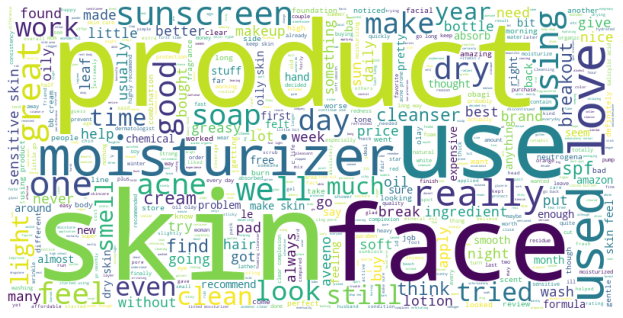

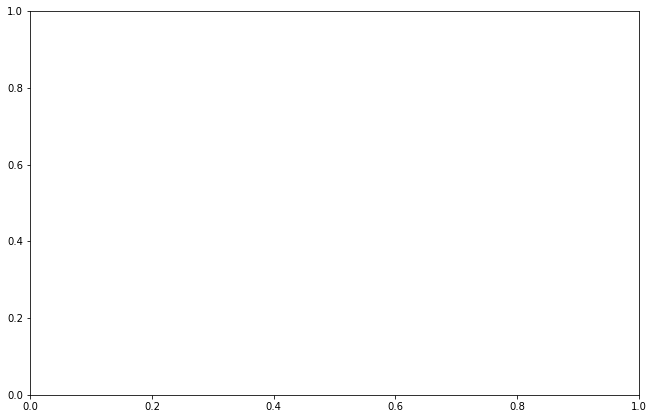

In [216]:
#Generate wordcloud for 2014
wc1 = WordCloud(background_color="white", max_words=2000, width=800, height=400)
wc2 = WordCloud(background_color="white", max_words=2000, width=800, height=400)

%matplotlib inline

fig1 = plt.figure(figsize=(24, 24))
# for i in [0,1]:
ax1 = fig1.add_subplot(3,2,1)
wordcloud = wc1.generate(' '.join(skincare_improved['review_concat']))
ax1.imshow(wordcloud)
ax1.axis('off')

fig2 = plt.figure(figsize=(24, 24))
ax2 = fig2.add_subplot(3,2,2)
wordcloud = wc2.generate(' '.join(skincare_improved['review_concat_2014_2N']))
ax2.imshow(wordcloud)
ax2.axis('off')


In [ ]:
#Analysis of 2021 Review
skincare_improved['review_2021_2N'] = skincare_improved['review_2021'].apply(lambda data: extract_ngrams(data))
skincare_improved['review_2021_2N'] = skincare_improved['review_2021_2N'].apply(lambda x:' '.join(x))

In [ ]:
#Generate wordcloud for 2021 skin product
wc1 = WordCloud(background_color="white", max_words=2000, width=800, height=400)
wc2 = WordCloud(background_color="white", max_words=2000, width=800, height=400)

%matplotlib inline

fig1 = plt.figure(figsize=(24, 24))
# for i in [0,1]:
ax1 = fig1.add_subplot(3,2,1)
wordcloud = wc1.generate(' '.join(skincare_improved['review_2021']))
ax1.imshow(wordcloud)
ax1.axis('off')

fig2 = plt.figure(figsize=(24, 24))
ax2 = fig2.add_subplot(3,2,2)
wordcloud = wc2.generate(' '.join(skincare_improved['review_2021_2N']))
ax2.imshow(wordcloud)
ax2.axis('off')

## For dropped Rating (Skin Products)

In [ ]:
#Analysis of 2014 Review
skincare_dropped['review_concat_2014_2N'] = skincare_dropped['review_concat'].apply(lambda data: extract_ngrams(data))
skincare_dropped['review_concat_2014_2N'] = skincare_dropped['review_concat_2014_2N'].apply(lambda x:' '.join(x))


In [ ]:
#Generate wordcloud for 2014
wc1 = WordCloud(background_color="white", max_words=2000, width=800, height=400)
wc2 = WordCloud(background_color="white", max_words=2000, width=800, height=400)

%matplotlib inline

fig1 = plt.figure(figsize=(24, 24))
# for i in [0,1]:
ax1 = fig1.add_subplot(3,2,1)
wordcloud = wc1.generate(' '.join(skincare_dropped['review_concat']))
ax1.imshow(wordcloud)
ax1.axis('off')

fig2 = plt.figure(figsize=(24, 24))
ax2 = fig2.add_subplot(3,2,2)
wordcloud = wc2.generate(' '.join(skincare_dropped['review_concat_2014_2N']))
ax2.imshow(wordcloud)
ax2.axis('off')

In [ ]:
#Analysis of 2021 Review
skincare_dropped['review_2021_2N'] = skincare_dropped['review_2021'].apply(lambda data: extract_ngrams(data))
skincare_dropped['review_2021_2N'] = skincare_dropped['review_2021_2N'].apply(lambda x:' '.join(x))

In [ ]:
#Generate wordcloud for 2021 skin product
wc1 = WordCloud(background_color="white", max_words=2000, width=800, height=400)
wc2 = WordCloud(background_color="white", max_words=2000, width=800, height=400)

%matplotlib inline

fig1 = plt.figure(figsize=(24, 24))
# for i in [0,1]:
ax1 = fig1.add_subplot(3,2,1)
wordcloud = wc1.generate(' '.join(skincare_dropped['review_2021']))
ax1.imshow(wordcloud)
ax1.axis('off')

fig2 = plt.figure(figsize=(24, 24))
ax2 = fig2.add_subplot(3,2,2)
wordcloud = wc2.generate(' '.join(skincare_dropped['review_2021_2N']))
ax2.imshow(wordcloud)
ax2.axis('off')

## For improved hair products 

In [ ]:
#Analysis of 2014 Review
haircare_improved['review_concat_2014_2N'] = haircare_improved['review_concat'].apply(lambda data: extract_ngrams(data))
haircare_improved['review_concat_2014_2N'] = haircare_improved['review_concat_2014_2N'].apply(lambda x:' '.join(x))


In [ ]:
#Generate wordcloud for 2014
wc1 = WordCloud(background_color="white", max_words=2000, width=800, height=400)
wc2 = WordCloud(background_color="white", max_words=2000, width=800, height=400)

%matplotlib inline

fig1 = plt.figure(figsize=(24, 24))
# for i in [0,1]:
ax1 = fig1.add_subplot(3,2,1)
wordcloud = wc1.generate(' '.join(haircare_improved['review_concat']))
ax1.imshow(wordcloud)
ax1.axis('off')

fig2 = plt.figure(figsize=(24, 24))
ax2 = fig2.add_subplot(3,2,2)
wordcloud = wc2.generate(' '.join(haircare_improved['review_concat_2014_2N']))
ax2.imshow(wordcloud)
ax2.axis('off')

In [ ]:
#Analysis of 2021 Review
haircare_improved['review_2021_2N'] = haircare_improved['review_2021'].apply(lambda data: extract_ngrams(data))
haircare_improved['review_2021_2N'] = haircare_improved['review_2021_2N'].apply(lambda x:' '.join(x))

In [ ]:
#Generate wordcloud for 2021 haircare product
wc1 = WordCloud(background_color="white", max_words=2000, width=800, height=400)
wc2 = WordCloud(background_color="white", max_words=2000, width=800, height=400)

%matplotlib inline

fig1 = plt.figure(figsize=(24, 24))
# for i in [0,1]:
ax1 = fig1.add_subplot(3,2,1)
wordcloud = wc1.generate(' '.join(haircare_improved['review_2021']))
ax1.imshow(wordcloud)
ax1.axis('off')

fig2 = plt.figure(figsize=(24, 24))
ax2 = fig2.add_subplot(3,2,2)
wordcloud = wc2.generate(' '.join(haircare_improved['review_2021_2N']))
ax2.imshow(wordcloud)
ax2.axis('off')

## For dropped hair products

In [217]:
#Analysis of 2014 Review
haircare_dropped['review_concat_2014_2N'] = haircare_dropped['review_concat'].apply(lambda data: extract_ngrams(data))
haircare_dropped['review_concat_2014_2N'] = haircare_dropped['review_concat_2014_2N'].apply(lambda x:' '.join(x))


NameError: name 'haircare_dropped' is not defined

NameError: name 'haircare_dropped' is not defined

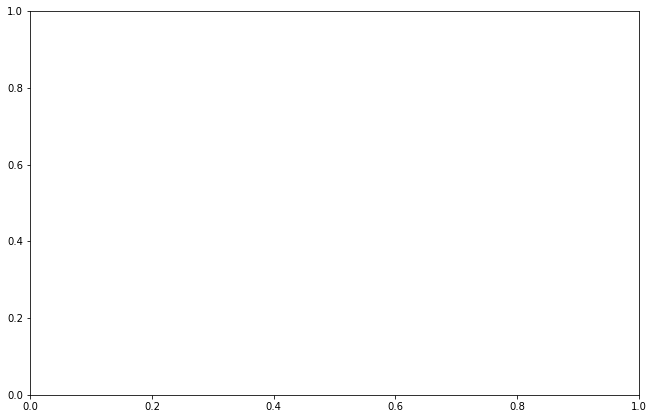

In [218]:
#Generate wordcloud for 2014
wc1 = WordCloud(background_color="white", max_words=2000, width=800, height=400)
wc2 = WordCloud(background_color="white", max_words=2000, width=800, height=400)

%matplotlib inline

fig1 = plt.figure(figsize=(24, 24))
# for i in [0,1]:
ax1 = fig1.add_subplot(3,2,1)
wordcloud = wc1.generate(' '.join(haircare_dropped['review_concat']))
ax1.imshow(wordcloud)
ax1.axis('off')

fig2 = plt.figure(figsize=(24, 24))
ax2 = fig2.add_subplot(3,2,2)
wordcloud = wc2.generate(' '.join(haircare_dropped['review_concat_2014_2N']))
ax2.imshow(wordcloud)
ax2.axis('off')

In [ ]:
#Analysis of 2021 Review
haircare_dropped['review_2021_2N'] = haircare_dropped['review_2021'].apply(lambda data: extract_ngrams(data))
haircare_dropped['review_2021_2N'] = haircare_dropped['review_2021_2N'].apply(lambda x:' '.join(x))


In [ ]:
#Generate wordcloud for 2021 haircare product
wc1 = WordCloud(background_color="white", max_words=2000, width=800, height=400)
wc2 = WordCloud(background_color="white", max_words=2000, width=800, height=400)

%matplotlib inline

fig1 = plt.figure(figsize=(24, 24))
# for i in [0,1]:
ax1 = fig1.add_subplot(3,2,1)
wordcloud = wc1.generate(' '.join(haircare_dropped['review_2021']))
ax1.imshow(wordcloud)
ax1.axis('off')

fig2 = plt.figure(figsize=(24, 24))
ax2 = fig2.add_subplot(3,2,2)
wordcloud = wc2.generate(' '.join(haircare_dropped['review_2021_2N']))
ax2.imshow(wordcloud)
ax2.axis('off')

In [ ]:
## For improved makeup products 


In [ ]:
#Analysis of 2014 Review
makeup_improved['review_concat_2014_2N'] = makeup_improved['review_concat'].apply(lambda data: extract_ngrams(data))
makeup_improved['review_concat_2014_2N'] = makeup_improved['review_concat_2014_2N'].apply(lambda x:' '.join(x))


In [ ]:
#Generate wordcloud for 2014
wc1 = WordCloud(background_color="white", max_words=2000, width=800, height=400)
wc2 = WordCloud(background_color="white", max_words=2000, width=800, height=400)

%matplotlib inline

fig1 = plt.figure(figsize=(24, 24))
# for i in [0,1]:
ax1 = fig1.add_subplot(3,2,1)
wordcloud = wc1.generate(' '.join(makeup_improved['review_concat']))
ax1.imshow(wordcloud)
ax1.axis('off')

fig2 = plt.figure(figsize=(24, 24))
ax2 = fig2.add_subplot(3,2,2)
wordcloud = wc2.generate(' '.join(makeup_improved['review_concat_2014_2N']))
ax2.imshow(wordcloud)
ax2.axis('off')

In [ ]:
#Analysis of 2021 Review
makeup_improved['review_2021_2N'] = makeup_improved['review_2021'].apply(lambda data: extract_ngrams(data))
makeup_improved['review_2021_2N'] = makeup_improved['review_2021_2N'].apply(lambda x:' '.join(x))


In [ ]:
#Generate wordcloud for 2021
wc1 = WordCloud(background_color="white", max_words=2000, width=800, height=400)
wc2 = WordCloud(background_color="white", max_words=2000, width=800, height=400)

%matplotlib inline

fig1 = plt.figure(figsize=(24, 24))
# for i in [0,1]:
ax1 = fig1.add_subplot(3,2,1)
wordcloud = wc1.generate(' '.join(makeup_improved['review_concat']))
ax1.imshow(wordcloud)
ax1.axis('off')

fig2 = plt.figure(figsize=(24, 24))
ax2 = fig2.add_subplot(3,2,2)
wordcloud = wc2.generate(' '.join(makeup_improved['review_2021_2N']))
ax2.imshow(wordcloud)
ax2.axis('off')

## For dropped makup products 

In [ ]:
#Analysis of 2014 Review
makeup_dropped['review_concat_2014_2N'] = makeup_dropped['review_concat'].apply(lambda data: extract_ngrams(data))
makeup_dropped['review_concat_2014_2N'] = makeup_dropped['review_concat_2014_2N'].apply(lambda x:' '.join(x))


In [ ]:
#Generate wordcloud for 2014
wc1 = WordCloud(background_color="white", max_words=2000, width=800, height=400)
wc2 = WordCloud(background_color="white", max_words=2000, width=800, height=400)

%matplotlib inline

fig1 = plt.figure(figsize=(24, 24))
# for i in [0,1]:
ax1 = fig1.add_subplot(3,2,1)
wordcloud = wc1.generate(' '.join(makeup_dropped['review_concat']))
ax1.imshow(wordcloud)
ax1.axis('off')

fig2 = plt.figure(figsize=(24, 24))
ax2 = fig2.add_subplot(3,2,2)
wordcloud = wc2.generate(' '.join(makeup_dropped['review_concat_2014_2N']))
ax2.imshow(wordcloud)
ax2.axis('off')

In [ ]:
#Analysis of 2021 Review
makeup_dropped['review_2021_2N'] = makeup_dropped['review_2021'].apply(lambda data: extract_ngrams(data))
makeup_dropped['review_2021_2N'] = makeup_dropped['review_2021_2N'].apply(lambda x:' '.join(x))


In [ ]:
#Generate wordcloud for 2021
wc1 = WordCloud(background_color="white", max_words=2000, width=800, height=400)
wc2 = WordCloud(background_color="white", max_words=2000, width=800, height=400)

%matplotlib inline

fig1 = plt.figure(figsize=(24, 24))
# for i in [0,1]:
ax1 = fig1.add_subplot(3,2,1)
wordcloud = wc1.generate(' '.join(makeup_dropped['review_concat']))
ax1.imshow(wordcloud)
ax1.axis('off')

fig2 = plt.figure(figsize=(24, 24))
ax2 = fig2.add_subplot(3,2,2)
wordcloud = wc2.generate(' '.join(makeup_dropped['review_2021_2N']))
ax2.imshow(wordcloud)
ax2.axis('off')